In [3]:
import pandas as pd
import numpy as np

In [4]:
import os

# Путь к папке
folder_path = r"C:\Users\Ольга\Downloads\Временной ряд WB"

# Генерация списка дат (каждое первое число месяца)
dates = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")

# Создание пустого списка для DataFrame
dataframes = []
# Чтение файлов и добавление столбца "Дата"
for date in dates:
    file_name = f"WB - Выбор ниши - {date.strftime('%d.%m.%Y')} - (21.12.2024).csv"
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        try:
            # Чтение CSV-файла, начиная со второй строки
            df = pd.read_csv(file_path, sep=";", engine="python", header=1)
            df['Дата'] = date  # Добавляем столбец с текущей датой
            dataframes.append(df)
        except Exception as e:
            print(f"Ошибка при обработке файла {file_name}: {e}")
    else:
        print(f"Файл не найден: {file_name}")
dataframes[0]

,Предметы,Сезонность ниши,Избранное,Комиссия FBO,Комиссия FBS,Товары,Количество новинок,Товары с остатками,Товары с движением,% товаров с движением,...,Медианная цена с продажами,Количество кликов на карточку,% добавления в корзину,% оформления заказов,Средний дробный рейтинг с продажами,Средний дробный рейтинг,Средний рейтинг с продажами,Средний рейтинг MPSTATS,Средний рейтинг MPSTATS с продажами,Дата
0,Телевизоры и аудиотехника / DJ контроллеры,3,False,"19,5","19,5",19,0,0,1,5,...,34821,0,0,0,NaN,"3,68",NaN,"48,32","45,00",2021-01-01
1,Товары для животных / Душевые лейки для животных,3,False,"11,5","11,5",13,1,12,12,92,...,863,0,0,0,"4,06","3,78","4,40","56,23","62,50",2021-01-01
2,Все для садоводства / Сумки для выращивания ра...,3,False,"19,5","19,5",9,0,8,9,100,...,"325,5",0,0,0,"4,28","4,28","4,60","49,56","51,62",2021-01-01
3,Автомобильные товары / Колпаки на колеса,2,False,"16,5","16,5",417,10,158,342,82,...,516,0,0,0,"4,04","4,11","4,17","43,24","45,28",2021-01-01
4,Продукты / Мюсли,2,False,"11,5","11,5",245,4,125,168,69,...,255,0,0,0,"4,16","4,07","4,32","51,54","55,00",2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,Спортивные аксессуары / Защита тела,1,False,"19,5","19,5",369,40,176,235,64,...,1216,0,0,0,"4,38","4,26","4,41","37,43","45,27",2021-01-01
5192,Одежда для малышей / Куртки для малышей,2,False,"24,5","24,5",626,86,360,390,62,...,"2015,5",0,0,0,"4,48","4,48","4,43","44,90","55,30",2021-01-01
5193,Рукоделие / Линейки закройщика,2,False,"19,5","19,5",77,1,47,63,82,...,"751,5",0,0,0,"4,45","4,40","4,38","48,62","54,54",2021-01-01
5194,Красота / Бальзамы,1,False,"22,5","22,5",5586,270,2943,3926,70,...,332,0,0,0,"4,28","4,26","4,32","54,92","59,97",2021-01-01


In [5]:
# Объединение всех DataFrame
if dataframes:
    final_df = pd.concat(dataframes, ignore_index=True)
else:
    final_df = pd.DataFrame()  # На случай, если нет подходящих файлов
    
# Проверяем наличие столбца и разделяем на "Категория" и "Товар"
if 'Предметы' in final_df.columns:
    final_df[['Категория', 'Товар']] = final_df['Предметы'].str.split(' / ', expand=True)
else:
    print("В DataFrame отсутствует столбец 'Предметы'.")
# Преобразование числовых данных в правильный формат
columns_to_convert = ['Выручка', '% продавцов с продажами', 'Средняя цена', 'Средний рейтинг с продажами',
                      'Средний рейтинг MPSTATS', 'Средний рейтинг MPSTATS с продажами']

for col in columns_to_convert:
    if col in final_df.columns:
        final_df[col] = final_df[col].astype(str).str.replace(' ', '', regex=True).str.replace(',', '.', regex=True).astype(float)    
        
final_df

,Предметы,Сезонность ниши,Избранное,Комиссия FBO,Комиссия FBS,Товары,Количество новинок,Товары с остатками,Товары с движением,% товаров с движением,...,% добавления в корзину,% оформления заказов,Средний дробный рейтинг с продажами,Средний дробный рейтинг,Средний рейтинг с продажами,Средний рейтинг MPSTATS,Средний рейтинг MPSTATS с продажами,Дата,Категория,Товар
0,Телевизоры и аудиотехника / DJ контроллеры,3,False,"19,5","19,5",19,0,0,1,5,...,0,0,NaN,"3,68",NaN,48.32,45.00,2021-01-01,Телевизоры и аудиотехника,DJ контроллеры
1,Товары для животных / Душевые лейки для животных,3,False,"11,5","11,5",13,1,12,12,92,...,0,0,"4,06","3,78",4.40,56.23,62.50,2021-01-01,Товары для животных,Душевые лейки для животных
2,Все для садоводства / Сумки для выращивания ра...,3,False,"19,5","19,5",9,0,8,9,100,...,0,0,"4,28","4,28",4.60,49.56,51.62,2021-01-01,Все для садоводства,Сумки для выращивания рассады
3,Автомобильные товары / Колпаки на колеса,2,False,"16,5","16,5",417,10,158,342,82,...,0,0,"4,04","4,11",4.17,43.24,45.28,2021-01-01,Автомобильные товары,Колпаки на колеса
4,Продукты / Мюсли,2,False,"11,5","11,5",245,4,125,168,69,...,0,0,"4,16","4,07",4.32,51.54,55.00,2021-01-01,Продукты,Мюсли
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328966,Красота / Бальзамы,1,False,"22,5","22,5",125593,10524,9073,14675,12,...,"10,88","18,46","4,73","4,66",4.90,38.15,60.07,2024-12-01,Красота,Бальзамы
328967,Игровые консоли и игры / Подписки игровых серв...,2,False,"11,5","11,5",4751,717,621,745,16,...,"4,59","10,49","4,72","4,69",4.85,30.94,59.70,2024-12-01,Игровые консоли и игры,Подписки игровых сервисов
328968,Ручной инструмент и оснастка / Ручки для валиков,2,False,"21,5","21,5",977,89,54,96,10,...,"3,85","9,28","4,74","4,79",4.88,27.42,46.20,2024-12-01,Ручной инструмент и оснастка,Ручки для валиков
328969,Посуда и инвентарь / Сливники для чая,3,False,"19,5","19,5",102,13,10,23,23,...,"5,52","10,14","4,84","4,79",4.91,49.77,61.91,2024-12-01,Посуда и инвентарь,Сливники для чая


In [6]:
final_df.columns

Index(['Предметы', 'Сезонность ниши', 'Избранное', 'Комиссия FBO',
       'Комиссия FBS', 'Товары', 'Количество новинок', 'Товары с остатками',
       'Товары с движением', '% товаров с движением', 'Товары с продажами',
       '% товаров с продажами', '% товаров с продажами от товаров с движением',
       'Бренды', 'Бренды с продажами', '% брендов с продажами', 'Продавцы',
       'Продавцы с продажами', '% продавцов с продажами', 'Продажи', 'Выручка',
       'Упущенная выручка', 'Упущенная выручка, %', 'Потенциал',
       'Средний % выкупа', 'Средний % выкупа с учетом возвратов',
       'Сумма выкупа', 'Сумма выкупа с учетом возврата', 'Суммарные остатки',
       'Замороженный остаток, шт.', 'Замороженный остаток в цене, ₽',
       'Замороженный остаток, %', 'Оборачиваемость, дн.', 'Оборачиваемость',
       'Минимальная цена', 'Максимальная цена', 'Средняя цена',
       'Медианная цена', 'Минимальная цена с продажами',
       'Максимальная цена с продажами', 'Средняя цена с продажами',

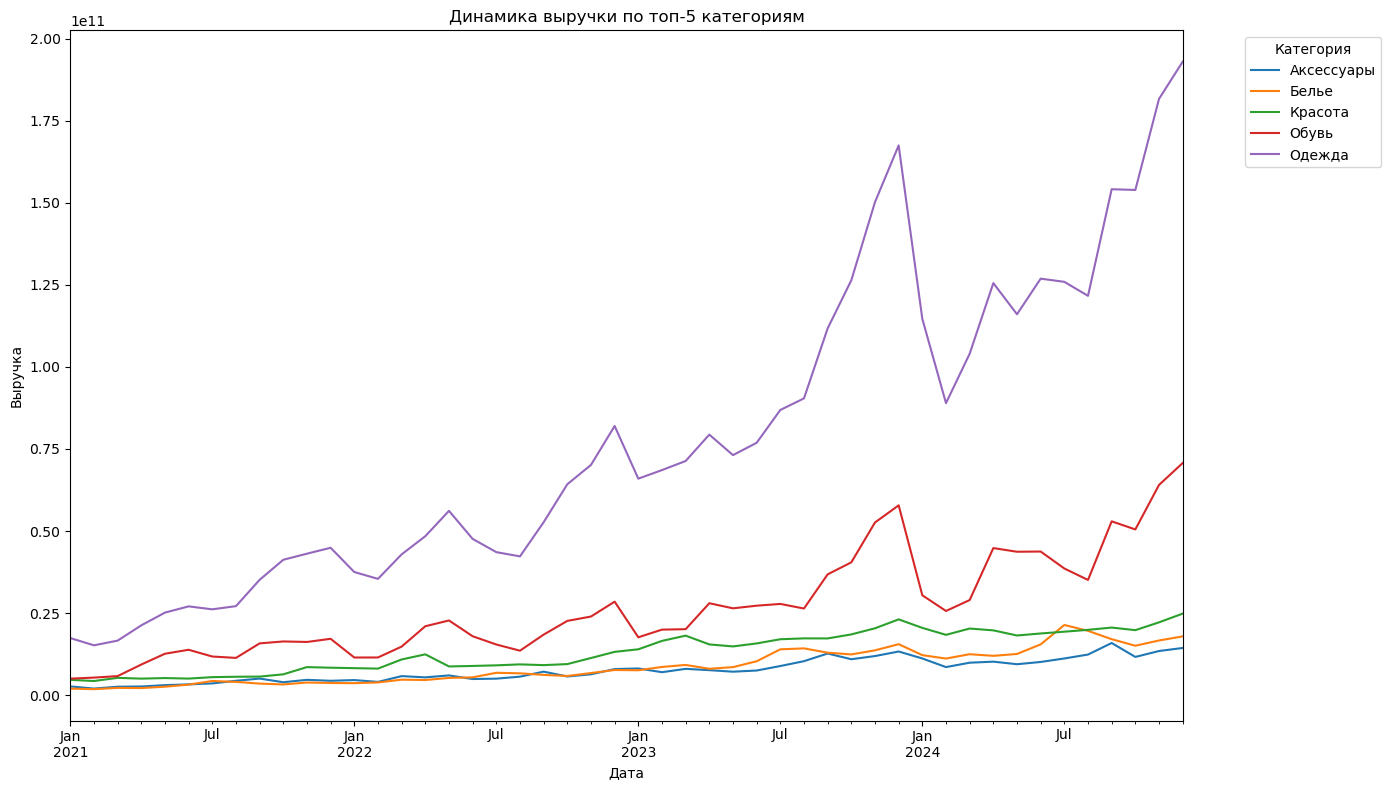

In [10]:
import matplotlib.pyplot as plt

# Проверяем, что необходимые столбцы существуют
if {'Дата', 'Категория', 'Выручка'}.issubset(final_df.columns):
    # Преобразуем столбец "Дата" в формат datetime
    final_df['Дата'] = pd.to_datetime(final_df['Дата'])
    
    # Группируем данные по категориям, суммируя выручку за всё время, и выбираем топ-5 категорий
    top_5_categories = final_df.groupby('Категория')['Выручка'].sum().nlargest(5).index
    
    # Фильтруем данные по топ-5 категориям
    filtered_df = final_df[final_df['Категория'].isin(top_5_categories)]
    
    # Группируем данные по дате и категории, суммируя выручку
    revenue_by_category = filtered_df.groupby(['Дата', 'Категория'])['Выручка'].sum().unstack()
    
    # Построение графика
    revenue_by_category.plot(kind='line', figsize=(14, 8), title='Динамика выручки по топ-5 категориям')
    plt.xlabel('Дата')
    plt.ylabel('Выручка')
    plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Необходимые столбцы 'Дата', 'Категория' или 'Выручка' отсутствуют в DataFrame.")

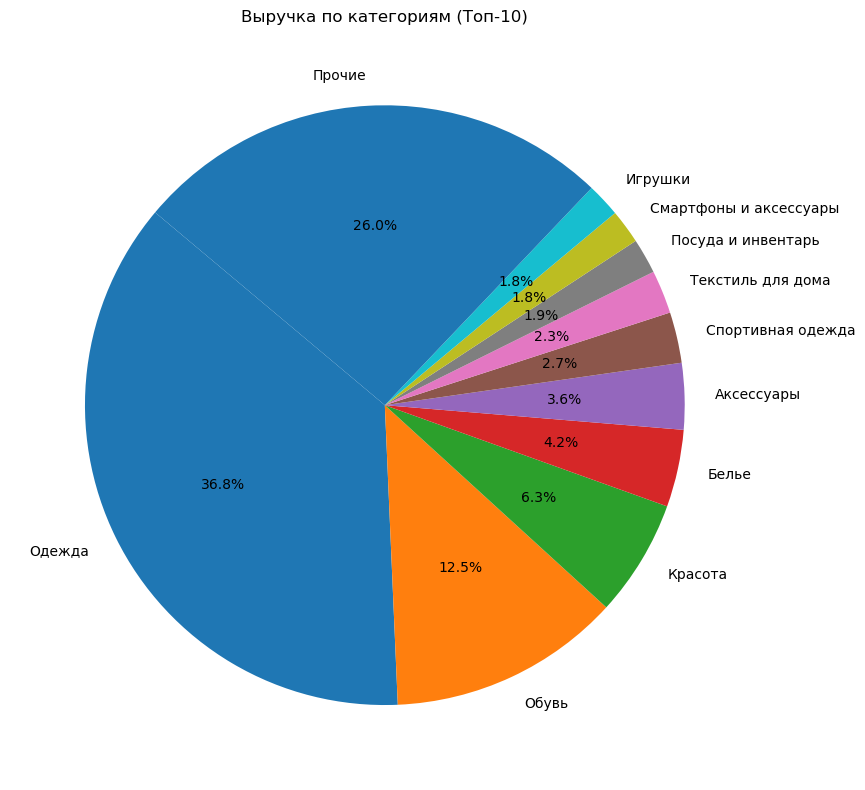

In [11]:
# Проверяем, что необходимые столбцы существуют
if {'Категория', 'Выручка'}.issubset(final_df.columns):
    # Группируем данные по категориям, суммируя выручку
    total_revenue_by_category = final_df.groupby('Категория')['Выручка'].sum()
    
    # Сортируем и выбираем 10 крупнейших категорий
    top_10_categories = total_revenue_by_category.nlargest(10)
    
    # Добавляем остальные категории в "Прочие"
    other_revenue = total_revenue_by_category.sum() - top_10_categories.sum()
    top_10_categories['Прочие'] = other_revenue
    
    # Построение круговой диаграммы
    plt.figure(figsize=(10, 8))
    top_10_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140, title='Выручка по категориям (Топ-10)')
    plt.ylabel('')  # Убираем подпись оси
    plt.tight_layout()
    plt.show()
else:
    print("Необходимые столбцы 'Категория' или 'Выручка' отсутствуют в DataFrame.")

In [12]:
# Устанавливаем отображение без научной нотации
pd.set_option('display.float_format', '{:.2f}'.format)

# Преобразование значений цен в числовой формат (с правильным форматом)
price_columns = ['Минимальная цена', 'Максимальная цена']
for col in price_columns:
    # Убираем лишние пробелы и заменяем запятые на точки
    final_df[col] = final_df[col].astype(str).str.replace(' ', '', regex=True).str.replace(',', '.', regex=True).astype(float)

# Рассчитываем волатильность как стандартное отклонение цен для каждого товара
final_df['Волатильность цены'] = final_df[price_columns].std(axis=1)

# Находим товары с наибольшей волатильностью
top_volatile_items = final_df[['Категория', 'Волатильность цены']].sort_values(by='Волатильность цены', ascending=False).head(10)

# Вывод результата
top_volatile_items

,Категория,Волатильность цены
323658,Здоровье,13755998.05
327999,Товары для отдыха и кемпинга,12432251.02
327325,Здоровье,11745869.54
321798,Здоровье,8999201.63
276257,Ноутбуки и компьютеры,8885249.25
326910,Канцелярские товары,7961207.06
327381,Оргтехника,7495488.15
327554,Посуда и инвентарь,7379810.43
326507,Электроинструмент и оборудование,7248869.10
328212,Электроинструмент и оборудование,7149503.63


In [13]:
final_df.columns

Index(['Предметы', 'Сезонность ниши', 'Избранное', 'Комиссия FBO',
       'Комиссия FBS', 'Товары', 'Количество новинок', 'Товары с остатками',
       'Товары с движением', '% товаров с движением', 'Товары с продажами',
       '% товаров с продажами', '% товаров с продажами от товаров с движением',
       'Бренды', 'Бренды с продажами', '% брендов с продажами', 'Продавцы',
       'Продавцы с продажами', '% продавцов с продажами', 'Продажи', 'Выручка',
       'Упущенная выручка', 'Упущенная выручка, %', 'Потенциал',
       'Средний % выкупа', 'Средний % выкупа с учетом возвратов',
       'Сумма выкупа', 'Сумма выкупа с учетом возврата', 'Суммарные остатки',
       'Замороженный остаток, шт.', 'Замороженный остаток в цене, ₽',
       'Замороженный остаток, %', 'Оборачиваемость, дн.', 'Оборачиваемость',
       'Минимальная цена', 'Максимальная цена', 'Средняя цена',
       'Медианная цена', 'Минимальная цена с продажами',
       'Максимальная цена с продажами', 'Средняя цена с продажами',

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Создание метки риска для категории
category_risk = final_df.groupby('Категория').agg({
    'Выручка': 'mean',
    '% продавцов с продажами': 'mean',
    'Средняя цена': 'std',  # Волатильность цены во времени
}).rename(columns={
    'Выручка': 'Средняя выручка',
    '% продавцов с продажами': 'Средний % продавцов с продажами',
    'Средняя цена': 'Волатильность цены (время)'
})

# Добавляем метку "Риск" (например, 1, если категория ниже 25% по выручке или выше 75% по волатильности)
category_risk['Риск'] = (
    (category_risk['Средняя выручка'] < category_risk['Средняя выручка'].quantile(0.25)) |
    (category_risk['Волатильность цены (время)'] > category_risk['Волатильность цены (время)'].quantile(0.75))
).astype(int)

# Выбор признаков и целевой переменной
X = category_risk[['Средняя выручка', 'Средний % продавцов с продажами', 'Волатильность цены (время)']].fillna(0)
y = category_risk['Риск']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Прогноз и оценка модели
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")

# Вывод важности признаков
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nВажность признаков:")
print(feature_importances)

# Вывод категорий с прогнозами
category_risk['Прогноз Риска'] = model.predict(X)
print("\nКатегории с прогнозами:")
category_risk[category_risk['Прогноз Риска'] == 1]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.93         7

    accuracy                           0.94        17
   macro avg       0.94      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17

ROC-AUC: 1.00

Важность признаков:
Волатильность цены (время)        0.42
Средняя выручка                   0.33
Средний % продавцов с продажами   0.25
dtype: float64

Категории с прогнозами:


,Средняя выручка,Средний % продавцов с продажами,Волатильность цены (время),Риск,Прогноз Риска
Категория,,,,,
Автомобильные товары,3078797.13,24.76,4573.46,1,1
Автоэлектроника,13155684.23,28.78,13757.82,1,1
Алкогольная продукция,320650.07,7.84,4747.86,1,1
Белье для малышей,11148323.71,36.74,13226.41,1,1
Бытовая техника,23120009.83,28.37,10839.45,0,1
Ветаптека,471.97,5.00,2160.63,1,1
Здоровье,8886065.66,39.00,13330.21,1,1
Крупная бытовая техника,13408997.93,26.19,34408.37,1,1
Мебель,793045.24,31.44,4106.61,1,1


In [15]:
category_risk[category_risk['Прогноз Риска'] == 0]

,Средняя выручка,Средний % продавцов с продажами,Волатильность цены (время),Риск,Прогноз Риска
Категория,,,,,
Аксессуары,59722468.38,44.67,1437.71,0,0
Аксессуары для волос,17967460.58,45.25,1686.45,0,0
Аксессуары для малышей,6286026.34,42.02,272.95,0,0
Аксессуары для обуви,6330497.51,41.57,408.73,0,0
Белье,136481922.66,50.46,1356.23,0,0
Бижутерия,52156484.37,47.35,950.89,0,0
Бытовая химия,36338085.59,33.07,834.69,0,0
Все для садоводства,7267622.14,31.22,3089.15,0,0
Головные уборы,133442736.65,49.22,825.64,0,0


In [16]:
final_df.columns

Index(['Предметы', 'Сезонность ниши', 'Избранное', 'Комиссия FBO',
       'Комиссия FBS', 'Товары', 'Количество новинок', 'Товары с остатками',
       'Товары с движением', '% товаров с движением', 'Товары с продажами',
       '% товаров с продажами', '% товаров с продажами от товаров с движением',
       'Бренды', 'Бренды с продажами', '% брендов с продажами', 'Продавцы',
       'Продавцы с продажами', '% продавцов с продажами', 'Продажи', 'Выручка',
       'Упущенная выручка', 'Упущенная выручка, %', 'Потенциал',
       'Средний % выкупа', 'Средний % выкупа с учетом возвратов',
       'Сумма выкупа', 'Сумма выкупа с учетом возврата', 'Суммарные остатки',
       'Замороженный остаток, шт.', 'Замороженный остаток в цене, ₽',
       'Замороженный остаток, %', 'Оборачиваемость, дн.', 'Оборачиваемость',
       'Минимальная цена', 'Максимальная цена', 'Средняя цена',
       'Медианная цена', 'Минимальная цена с продажами',
       'Максимальная цена с продажами', 'Средняя цена с продажами',

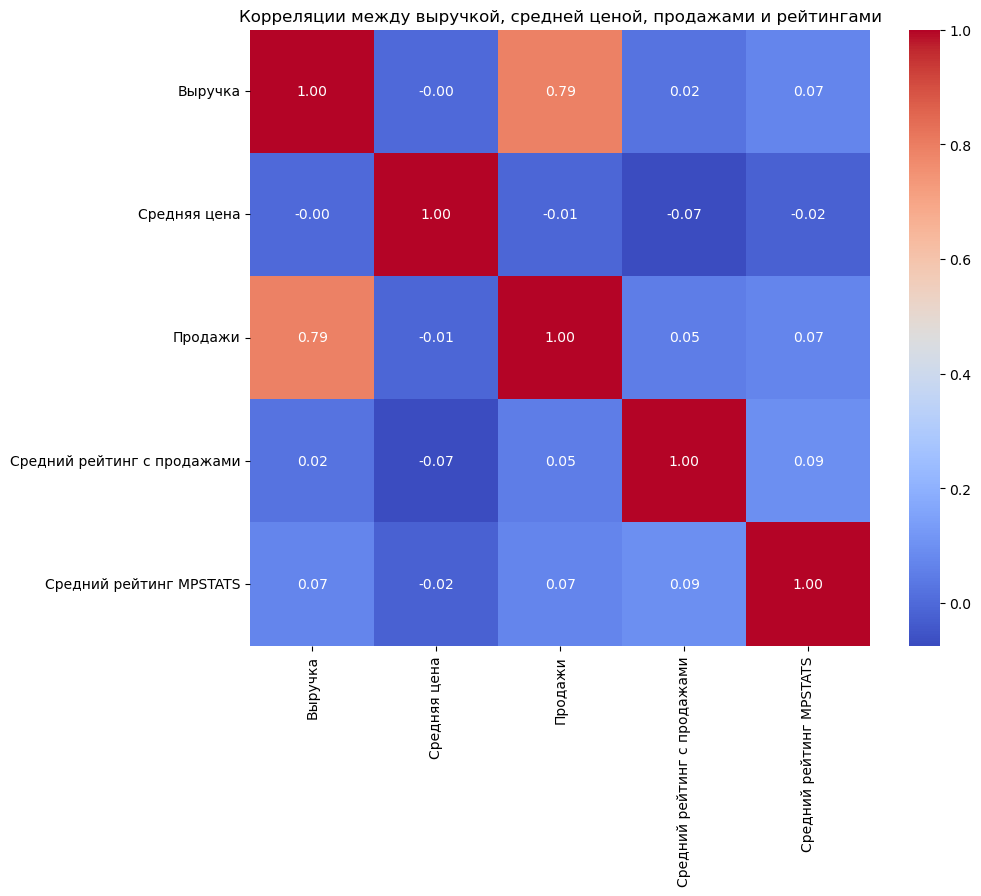

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем доступные колонки для анализа
selected_columns = ['Выручка', 'Средняя цена', 'Продажи', 'Средний дробный рейтинг', 
                    'Средний рейтинг с продажами', 'Средний рейтинг MPSTATS']

# Фильтруем данные для указанных столбцов
filtered_df = final_df[selected_columns].select_dtypes(include=['number'])

# Рассчитываем корреляционную матрицу
correlation_matrix = filtered_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Корреляции между выручкой, средней ценой, продажами и рейтингами")
plt.show()

C:\Games\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Games\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Games\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Games\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Games\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Games\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warning

Недостаточно данных для сезонной модели для категории Транспортные средства
Недостаточно данных для сезонной модели для категории Ремесленные товары
Результаты прогноза:
                 Категория    Выручка 2024  Прогноз выручки 2025  \
0     Автомобильные товары  37334694043.00        55873886363.95   
1          Автоэлектроника   6525367280.00        10109570409.57   
2               Аксессуары 138370776255.00       171018982871.35   
3     Аксессуары для волос  10230676939.00        13406064755.02   
4   Аксессуары для малышей   2061350817.00         2787528823.27   
..                     ...             ...                   ...   
75     Ювелирная бижутерия       252739.00          418194007.08   
76     Ювелирные украшения  27107592776.00        30883726921.66   
77             Страхование          119.00               4306.75   
78                   Фарма        38740.00            1394216.75   
79               Ветаптека        32081.00             236799.37   

    Изменение

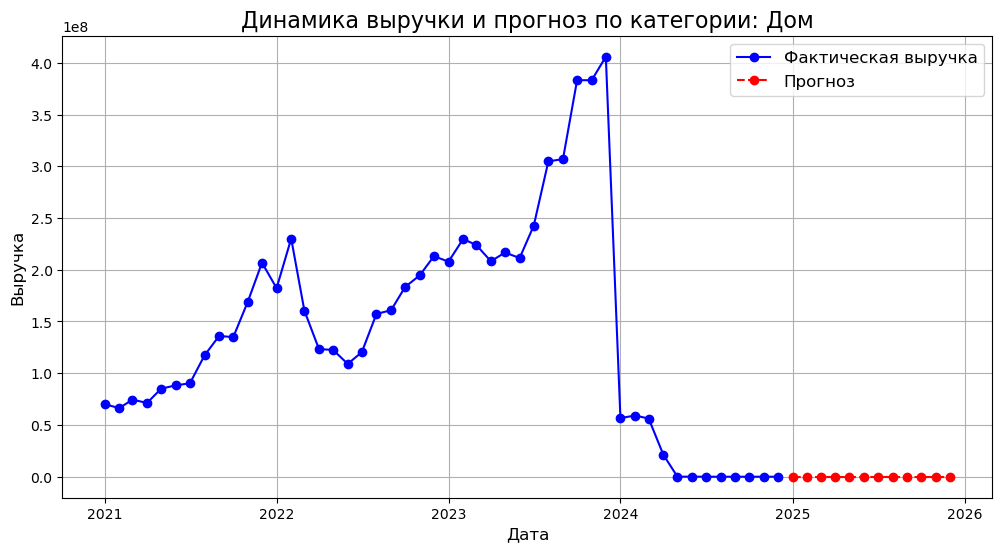

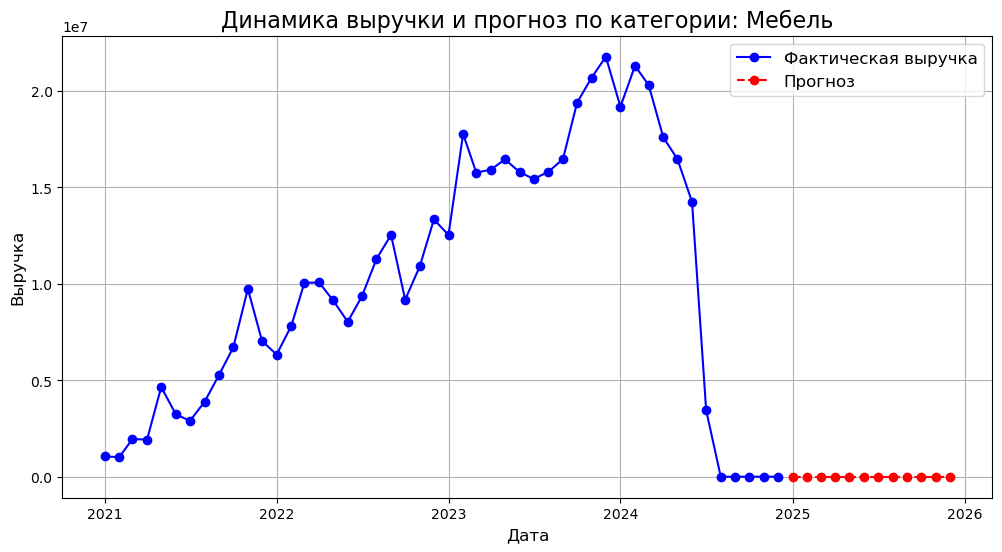

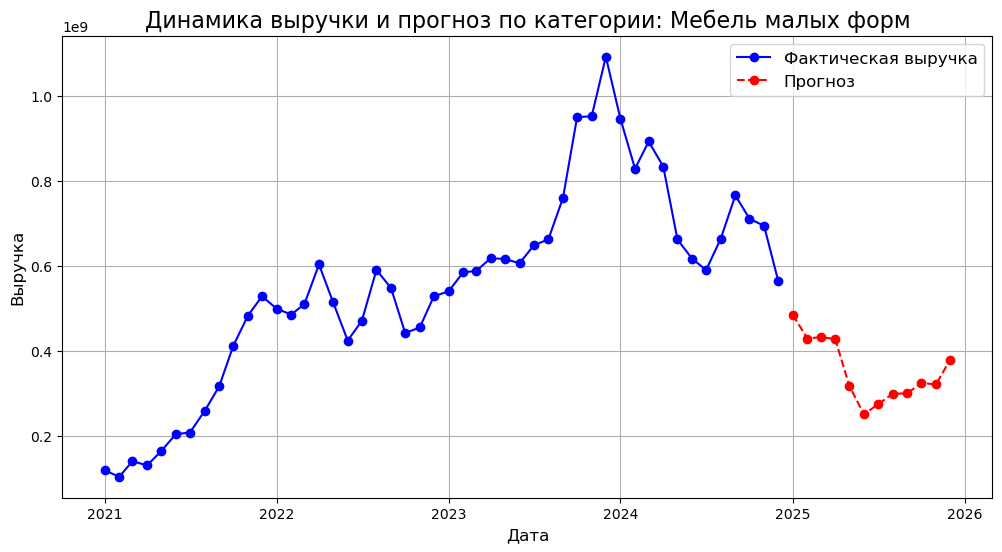

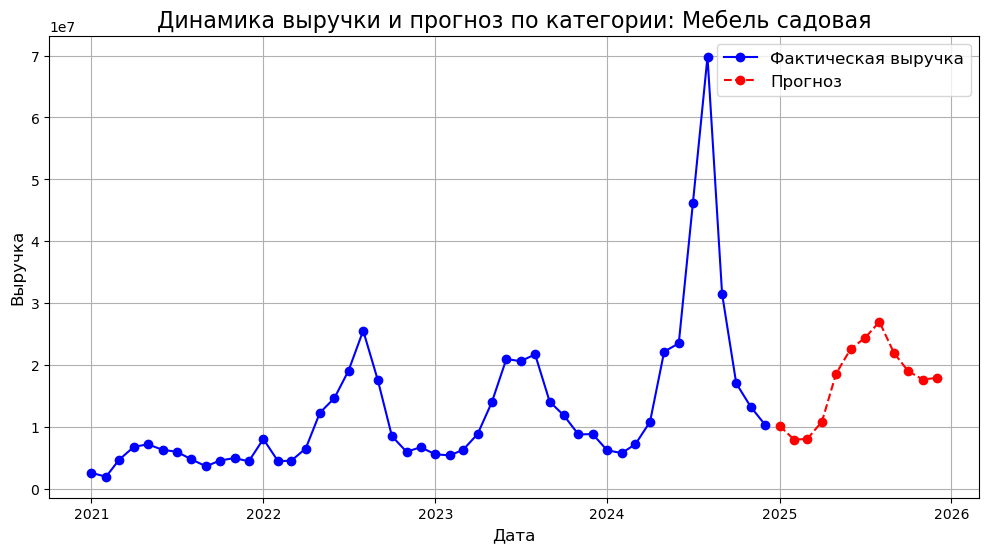

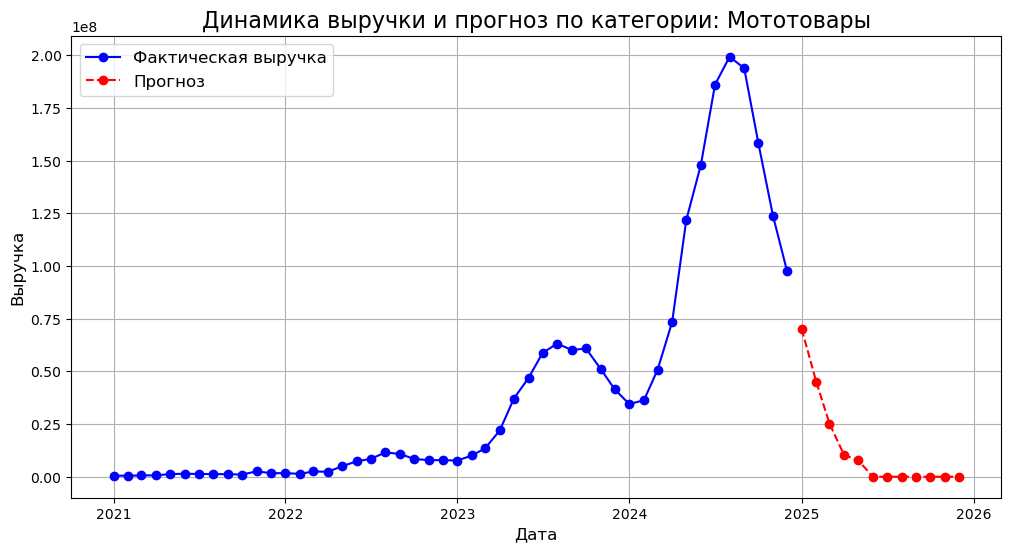

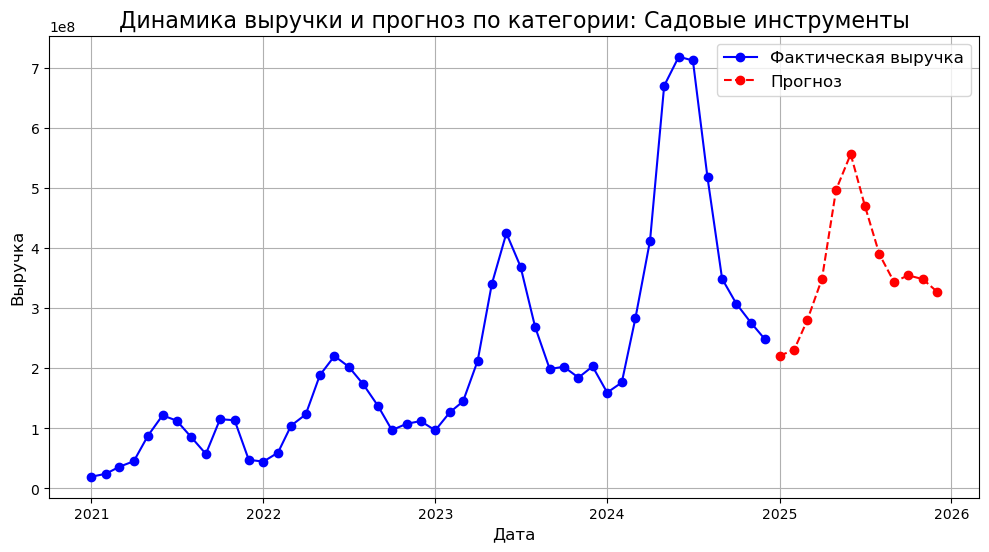

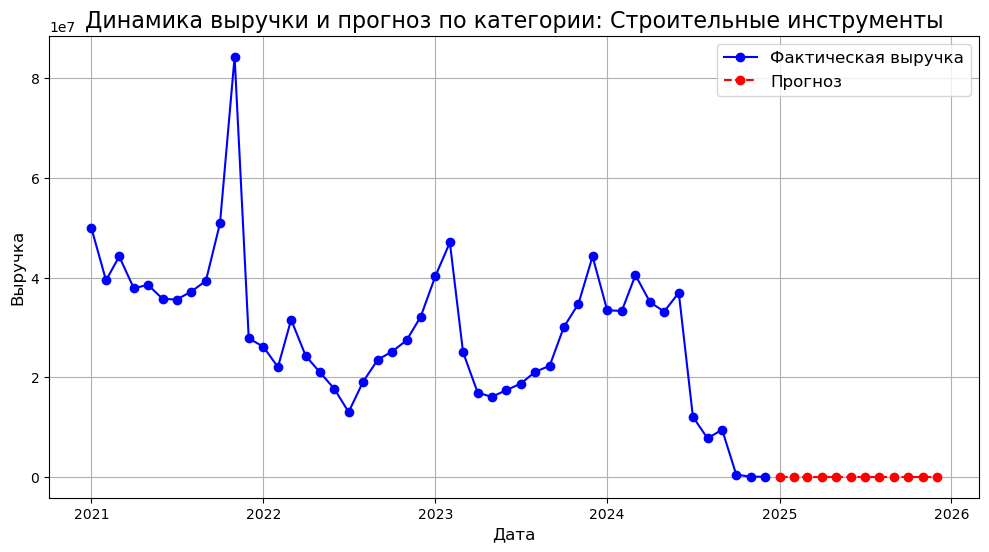

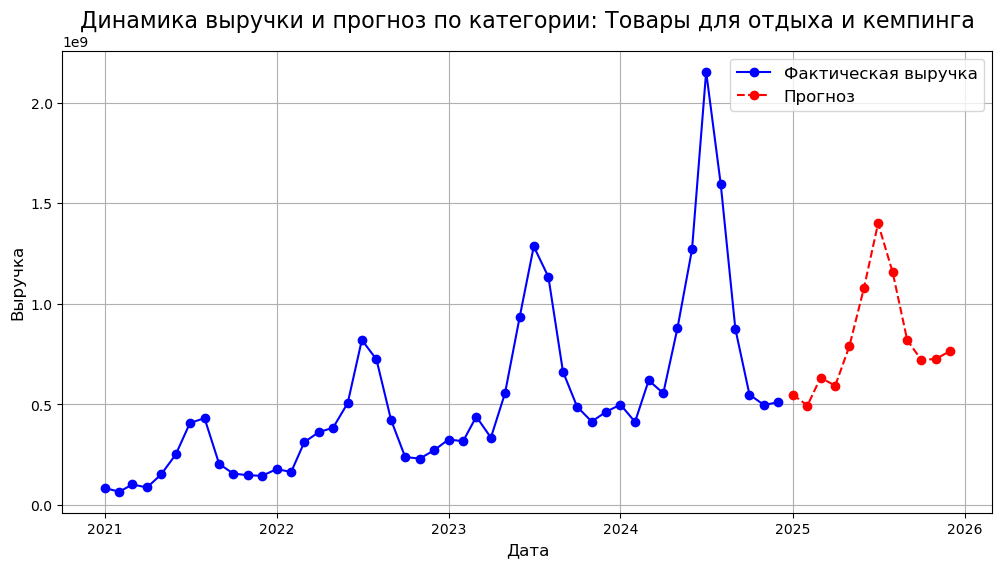

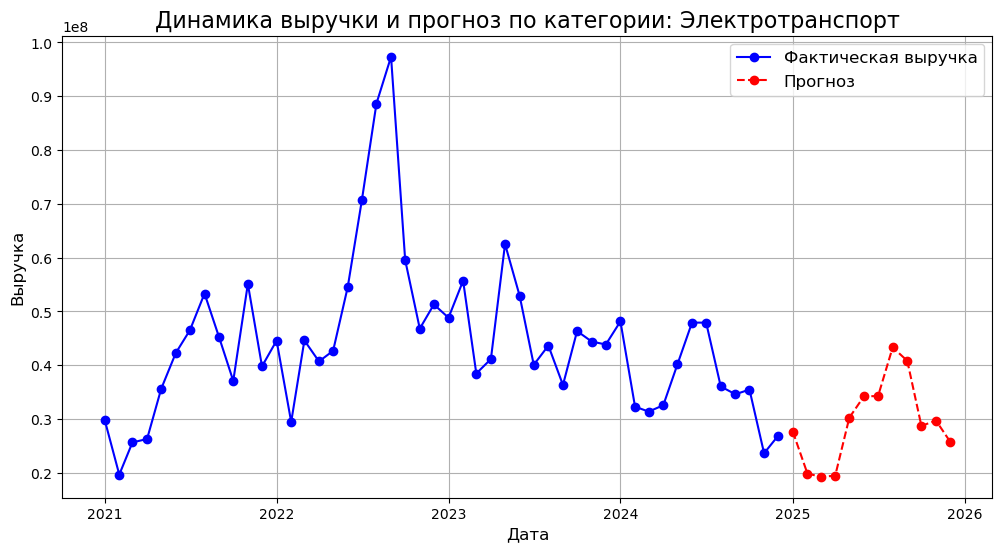

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Убедимся, что данные корректны
final_df['Дата'] = pd.to_datetime(final_df['Дата'])

# Группируем данные по категориям и датам
df_grouped = final_df.groupby(['Дата', 'Категория'])['Выручка'].sum().reset_index()

categories = df_grouped['Категория'].unique()
results = []

for category in categories:
    # Фильтрация данных для конкретной категории
    category_data = df_grouped[df_grouped['Категория'] == category]
    category_data = category_data.set_index('Дата').resample('MS').sum()  # Убедимся, что данные с интервалом месяц
    
    # Заполняем пропуски (если есть)
    category_data = category_data.asfreq('MS').fillna(0)
    
    # Проверяем длину данных
    if len(category_data) < 24:  # Меньше двух лет
        print(f"Недостаточно данных для сезонной модели для категории {category}")
        continue

    # Данные для модели
    train = category_data['Выручка']
    
    # Модель Holt-Winters с сезонностью
    model = ExponentialSmoothing(
        train,
        trend="add",
        seasonal="add",
        seasonal_periods=12  # Годовая сезонность
    )
    
    # Обучение модели
    fitted_model = model.fit()
    
    # Прогноз на 2025 год
    forecast = fitted_model.forecast(steps=12)
    forecast[forecast < 0] = 0  # Убираем отрицательные значения в прогнозе
    forecast_dates = pd.date_range(start='2025-01-01', periods=12, freq='MS')
    
    # Сравнение выручки 2024 и прогноза на 2025 год
    total_2024 = train.loc['2024-01-01':'2024-12-01'].sum()
    total_2025 = forecast.sum()
    delta = total_2025 - total_2024
    
    # Сохранение результатов
    results.append({
        'Категория': category,
        'Выручка 2024': total_2024,
        'Прогноз выручки 2025': total_2025,
        'Изменение выручки': delta,
        'Данные': category_data,
        'Прогноз': forecast,
        'Прогнозные даты': forecast_dates
    })

# Анализ результатов
results_df = pd.DataFrame(results)
results_df['Процентное изменение'] = (results_df['Изменение выручки'] / results_df['Выручка 2024']) * 100

# Категории с падением выручки
falling_categories = results_df[results_df['Изменение выручки'] < 0]

# Вывод результатов
print("Результаты прогноза:")
print(results_df)
print("\nКатегории с падением выручки:")
print(falling_categories)

# Построение графиков для категорий с падением выручки
for _, row in falling_categories.iterrows():
    category = row['Категория']
    category_data = row['Данные']
    forecast = row['Прогноз']
    forecast_dates = row['Прогнозные даты']
    
    # График
    plt.figure(figsize=(12, 6))
    plt.plot(category_data.index, category_data['Выручка'], marker='o', label='Фактическая выручка', color='blue')
    plt.plot(forecast_dates, forecast, marker='o', label='Прогноз', color='red', linestyle='--')
    plt.title(f"Динамика выручки и прогноз по категории: {category}", fontsize=16)
    plt.xlabel('Дата', fontsize=12)
    plt.ylabel('Выручка', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


In [19]:
falling_categories

,Категория,Выручка 2024,Прогноз выручки 2025,Изменение выручки,Данные,Прогноз,Прогнозные даты,Процентное изменение
17,Дом,193521420.00,0.00,-193521420.00,Категория Выручка Дата ...,2025-01-01 0.00 2025-02-01 0.00 2025-03-01...,"DatetimeIndex(['2025-01-01', '2025-02-01', '20...",-100.00
25,Мебель,112553307.00,0.00,-112553307.00,Категория Выручка Дата ...,2025-01-01 0.00 2025-02-01 0.00 2025-03-01...,"DatetimeIndex(['2025-01-01', '2025-02-01', '20...",-100.00
28,Мебель малых форм,8765866313.00,4233445660.63,-4532420652.37,Категория Выручка Да...,2025-01-01 483873277.97 2025-02-01 4285179...,"DatetimeIndex(['2025-01-01', '2025-02-01', '20...",-51.71
31,Мебель садовая,263584493.00,205884269.86,-57700223.14,Категория Выручка Дата ...,2025-01-01 10145745.78 2025-02-01 7916451...,"DatetimeIndex(['2025-01-01', '2025-02-01', '20...",-21.89
32,Мототовары,1423171109.00,158347726.10,-1264823382.90,Категория Выручка Дата ...,2025-01-01 70032546.51 2025-02-01 44979238...,"DatetimeIndex(['2025-01-01', '2025-02-01', '20...",-88.87
47,Садовые инструменты,4833942351.00,4371471969.87,-462470381.13,Категория Выручка Д...,2025-01-01 220972591.49 2025-02-01 2309440...,"DatetimeIndex(['2025-01-01', '2025-02-01', '20...",-9.57
57,Строительные инструменты,241988455.00,0.00,-241988455.00,Категория Выруч...,2025-01-01 0.00 2025-02-01 0.00 2025-03-01...,"DatetimeIndex(['2025-01-01', '2025-02-01', '20...",-100.00
66,Товары для отдыха и кемпинга,10409693321.00,9718752021.02,-690941299.98,Категория ...,2025-01-01 548304826.45 2025-02-01 49408...,"DatetimeIndex(['2025-01-01', '2025-02-01', '20...",-6.64
74,Электротранспорт,436944253.00,353235040.51,-83709212.49,Категория Выручка Дата ...,2025-01-01 27645977.84 2025-02-01 19854725...,"DatetimeIndex(['2025-01-01', '2025-02-01', '20...",-19.16


In [20]:
final_df[(final_df['Категория'] == 'Строительные инструменты') & (final_df['Дата'] == '2024-11-01')][['Выручка', 'Товар']]

,Выручка,Товар
314439,0.00,Балясины
314516,0.00,Смазки для сверления
316690,0.00,Проволоки сварочные
316874,0.00,Шарниры для ригелей
317638,0.00,Поручни
318586,0.00,Крепления для поручней
319294,0.00,Отражатели для нивелиров
319754,0.00,Уровни цифровые
319799,0.00,Клещи токоизмерительные
320102,0.00,Мультиметры


In [22]:
final_df['Категория'].unique()

,Предметы,Сезонность ниши,Избранное,Комиссия FBO,Комиссия FBS,Товары,Количество новинок,Товары с остатками,Товары с движением,% товаров с движением,...,% оформления заказов,Средний дробный рейтинг с продажами,Средний дробный рейтинг,Средний рейтинг с продажами,Средний рейтинг MPSTATS,Средний рейтинг MPSTATS с продажами,Дата,Категория,Товар,Волатильность цены
0,Телевизоры и аудиотехника / DJ контроллеры,3,False,"19,5","19,5",19,0,0,1,5,...,0,NaN,"3,68",NaN,48.32,45.00,2021-01-01,Телевизоры и аудиотехника,DJ контроллеры,35460.70
1,Товары для животных / Душевые лейки для животных,3,False,"11,5","11,5",13,1,12,12,92,...,0,"4,06","3,78",4.40,56.23,62.50,2021-01-01,Товары для животных,Душевые лейки для животных,1405.02
2,Все для садоводства / Сумки для выращивания ра...,3,False,"19,5","19,5",9,0,8,9,100,...,0,"4,28","4,28",4.60,49.56,51.62,2021-01-01,Все для садоводства,Сумки для выращивания рассады,282.84
3,Автомобильные товары / Колпаки на колеса,2,False,"16,5","16,5",417,10,158,342,82,...,0,"4,04","4,11",4.17,43.24,45.28,2021-01-01,Автомобильные товары,Колпаки на колеса,3882.72
4,Продукты / Мюсли,2,False,"11,5","11,5",245,4,125,168,69,...,0,"4,16","4,07",4.32,51.54,55.00,2021-01-01,Продукты,Мюсли,820.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328966,Красота / Бальзамы,1,False,"22,5","22,5",125593,10524,9073,14675,12,...,"18,46","4,73","4,66",4.90,38.15,60.07,2024-12-01,Красота,Бальзамы,71749.42
328967,Игровые консоли и игры / Подписки игровых серв...,2,False,"11,5","11,5",4751,717,621,745,16,...,"10,49","4,72","4,69",4.85,30.94,59.70,2024-12-01,Игровые консоли и игры,Подписки игровых сервисов,190882.06
328968,Ручной инструмент и оснастка / Ручки для валиков,2,False,"21,5","21,5",977,89,54,96,10,...,"9,28","4,74","4,79",4.88,27.42,46.20,2024-12-01,Ручной инструмент и оснастка,Ручки для валиков,7169.36
328969,Посуда и инвентарь / Сливники для чая,3,False,"19,5","19,5",102,13,10,23,23,...,"10,14","4,84","4,79",4.91,49.77,61.91,2024-12-01,Посуда и инвентарь,Сливники для чая,9061.57


In [29]:
# Определяем группы для категорий
category_groups = {
    "Мебель": [
        'Мебель', 'Мебель корпусная и мебель для хранения', 'Мебель мягкая',
        'Мебель офисная и торговое оборудование', 'Мебель малых форм',
        'Мебель садовая', 'Мебель для сна'
    ],
    "Товары для дома": [
        'Текстиль для дома', 'Шторы и аксессуары', 'Декор интерьера',
        'Хранение вещей', 'Дом', 'Бытовая техника', 'Техника для кухни',
        'Хозяйственные товары', 'Посуда и инвентарь', 'Для праздника', 'Бытовая химия'
    ],
    "Электроника и техника": [
        'Электроника', 'Телевизоры и аудиотехника', 'Фото и Видеотехника',
        'Смартфоны и аксессуары', 'Ноутбуки и компьютеры',
        'Периферия и аксессуары', 'Сетевое оборудование',
        'Крупная бытовая техника', 'Игровые консоли и игры', 'Оргтехника'
    ],
    "Одежда": [
        'Одежда', 'Белье', 'Спортивная одежда',
        'Спецодежда и СИЗы', 'Головные уборы'
    ],
    "Обувь":['Обувь', 'Спортивная обувь',
        
    ],
    "Аксессуары и ювелирка":[ 'Аксессуары',
        'Аксессуары для обуви', 'Аксессуары для волос',
        'Ювелирные украшения', 'Бижутерия', 'Ювелирная бижутерия'
    ],
    "Товары для детей": [
        'Товары для малышей', 'Игрушки', 'Детское питание',
        'Одежда для малышей', 
        'Аксессуары для малышей', 'Белье для малышей'
    ],
    "Спорт и активный отдых": [
        'Спортивные аксессуары', 'Спортивный товар',
        'Спортивное питание и косметика',
        'Товары для отдыха и кемпинга'
    ],
    "Стройка": [
        'Строительные материалы', 'Строительные инструменты',
        'Ручной инструмент и оснастка', 'Сантехника', 'Отделочные материалы', 'Освещение', 'Умный дом и безопасность',
        'Электроинструмент и оборудование',
    ],
    "Сад и садоводство": [
        'Садовые инструменты', 'Садовая техника', 'Все для садоводства'
    ],
    "Автомобили и транспорт": [
        'Автомобильные товары', 'Мототовары', 'Транспортные средства',
        'Автоэлектроника', 'Электротранспорт'
    ],
    "Красота и здоровье": [
        'Красота', 'Здоровье',
        'Спортивное питание и косметика', 'Фарма'
    ],
    "Продукты и напитки": [
        'Продукты', 'Алкогольная продукция'
    ],
    "Канцтовары и книги": [
        'Канцелярские товары', 'Книжная продукция и диски'
    ],
    "Хобби и развлечения": [
        'Рукоделие', 'Профессиональные музыкальные инструменты',
        'Товары для курения', 'Товары для взрослых', 
    ],
    "Животные": [ 'Ветаптека', 'Товары для животных'
        
    ],
    "Прочее": [
         'Страхование', 'Ремесленные товары'
    ]
}

def map_new_category(category):
    for group, group_categories in category_groups.items():
        if category in group_categories:
            return group
    return "Неопределённые"

# Добавляем новую категорию в final_df
new_df = final_df
new_df['Новая категория'] = new_df['Категория'].apply(map_new_category)

# Проверка результата
new_df

,Предметы,Сезонность ниши,Избранное,Комиссия FBO,Комиссия FBS,Товары,Количество новинок,Товары с остатками,Товары с движением,% товаров с движением,...,Средний рейтинг с продажами,Средний рейтинг MPSTATS,Средний рейтинг MPSTATS с продажами,Дата,Категория,Товар,Волатильность цены,Новая категория,Процент возвратов,Разница % выкупа
0,Телевизоры и аудиотехника / DJ контроллеры,3,False,"19,5","19,5",19,0,0,1,5,...,NaN,48.32,45.00,2021-01-01,Телевизоры и аудиотехника,DJ контроллеры,35460.70,Электроника и техника,100.00,0
1,Товары для животных / Душевые лейки для животных,3,False,"11,5","11,5",13,1,12,12,92,...,4.40,56.23,62.50,2021-01-01,Товары для животных,Душевые лейки для животных,1405.02,Животные,100.00,0
2,Все для садоводства / Сумки для выращивания ра...,3,False,"19,5","19,5",9,0,8,9,100,...,4.60,49.56,51.62,2021-01-01,Все для садоводства,Сумки для выращивания рассады,282.84,Сад и садоводство,97.78,-2
3,Автомобильные товары / Колпаки на колеса,2,False,"16,5","16,5",417,10,158,342,82,...,4.17,43.24,45.28,2021-01-01,Автомобильные товары,Колпаки на колеса,3882.72,Автомобили и транспорт,92.33,-6
4,Продукты / Мюсли,2,False,"11,5","11,5",245,4,125,168,69,...,4.32,51.54,55.00,2021-01-01,Продукты,Мюсли,820.95,Продукты и напитки,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328966,Красота / Бальзамы,1,False,"22,5","22,5",125593,10524,9073,14675,12,...,4.90,38.15,60.07,2024-12-01,Красота,Бальзамы,71749.42,Красота и здоровье,99.98,0
328967,Игровые консоли и игры / Подписки игровых серв...,2,False,"11,5","11,5",4751,717,621,745,16,...,4.85,30.94,59.70,2024-12-01,Игровые консоли и игры,Подписки игровых сервисов,190882.06,Электроника и техника,99.68,0
328968,Ручной инструмент и оснастка / Ручки для валиков,2,False,"21,5","21,5",977,89,54,96,10,...,4.88,27.42,46.20,2024-12-01,Ручной инструмент и оснастка,Ручки для валиков,7169.36,Стройка,100.00,0
328969,Посуда и инвентарь / Сливники для чая,3,False,"19,5","19,5",102,13,10,23,23,...,4.91,49.77,61.91,2024-12-01,Посуда и инвентарь,Сливники для чая,9061.57,Товары для дома,98.48,-2


C:\Games\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Games\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Games\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Games\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Games\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Games\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warning

Результаты прогноза:
           Новая категория     Выручка 2024  Прогноз выручки 2025  \
0   Автомобили и транспорт   45720185185.00        67887437682.21   
1    Аксессуары и ювелирка  212620793600.00       260868737927.28   
2                 Животные   36603436608.00        43656264080.20   
3       Канцтовары и книги   73409687761.00        90622958153.65   
4       Красота и здоровье  292893504048.00       372010955334.60   
5                   Мебель   42567228329.00        57514045767.60   
6                    Обувь  538132365988.00       782202896209.59   
7                   Одежда 1963650593509.00      2636114309740.10   
8       Продукты и напитки   54699369864.00        67007275327.27   
9        Сад и садоводство   30972045471.00        37431667038.71   
10  Спорт и активный отдых   79449249616.00        91248173246.81   
11                 Стройка   78437343224.00       124917785270.36   
12        Товары для детей  138538485390.00       169048279676.31   
13         То

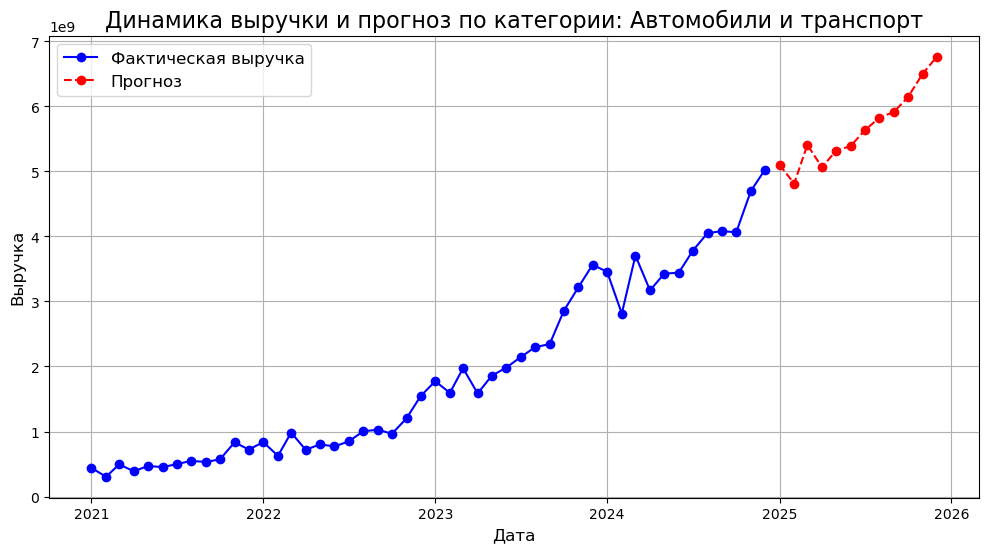

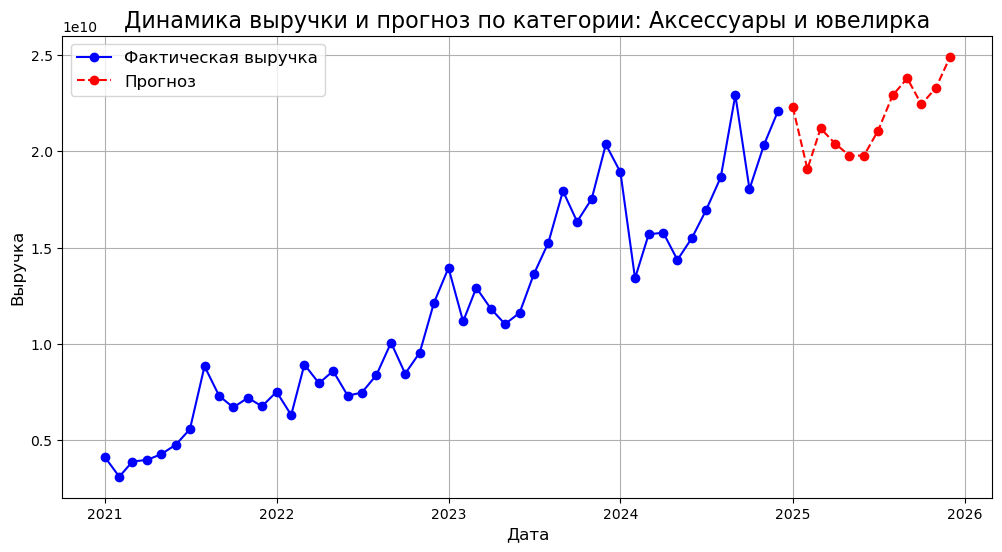

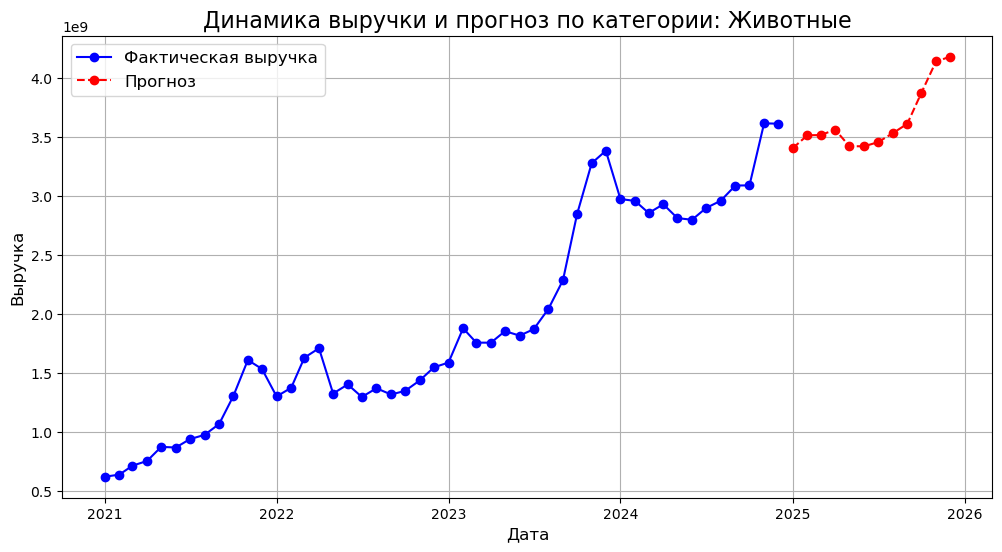

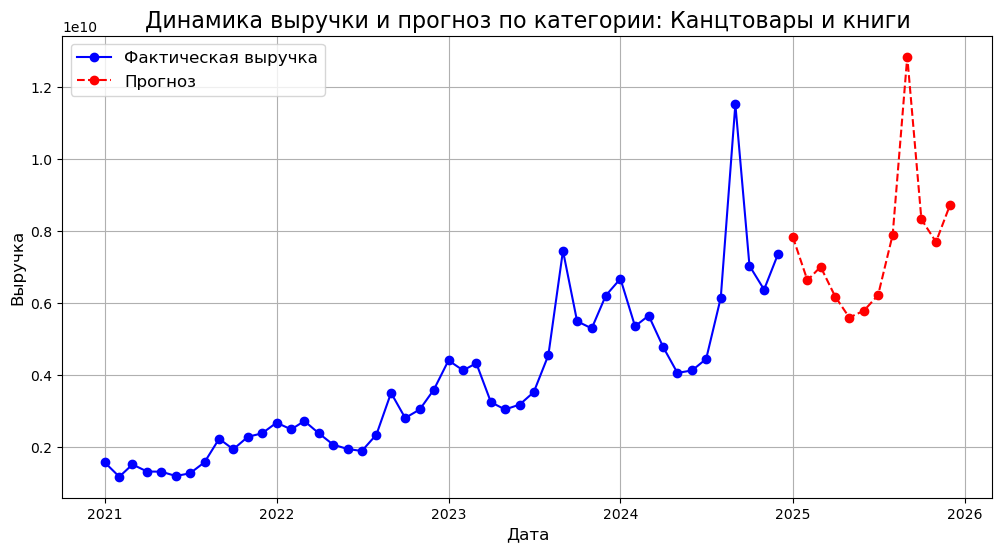

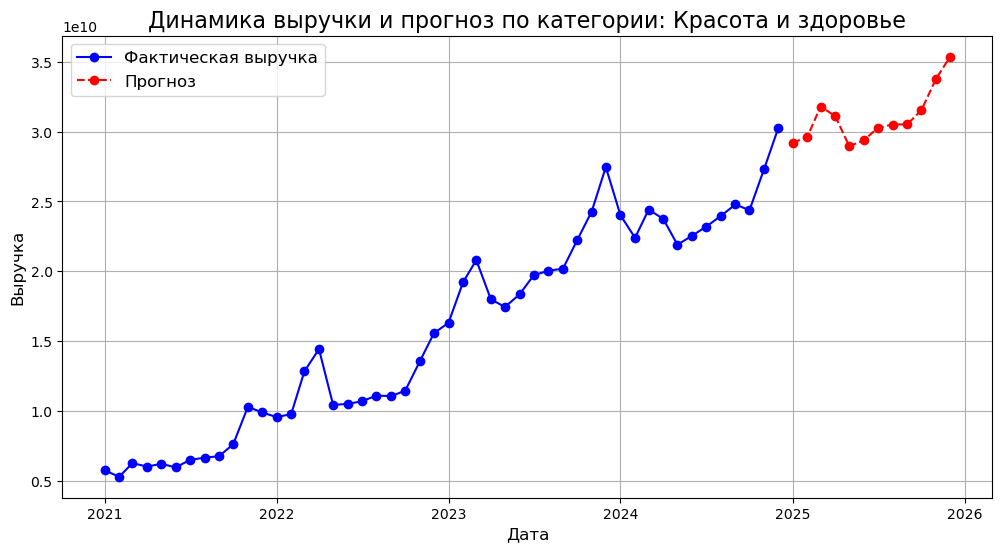

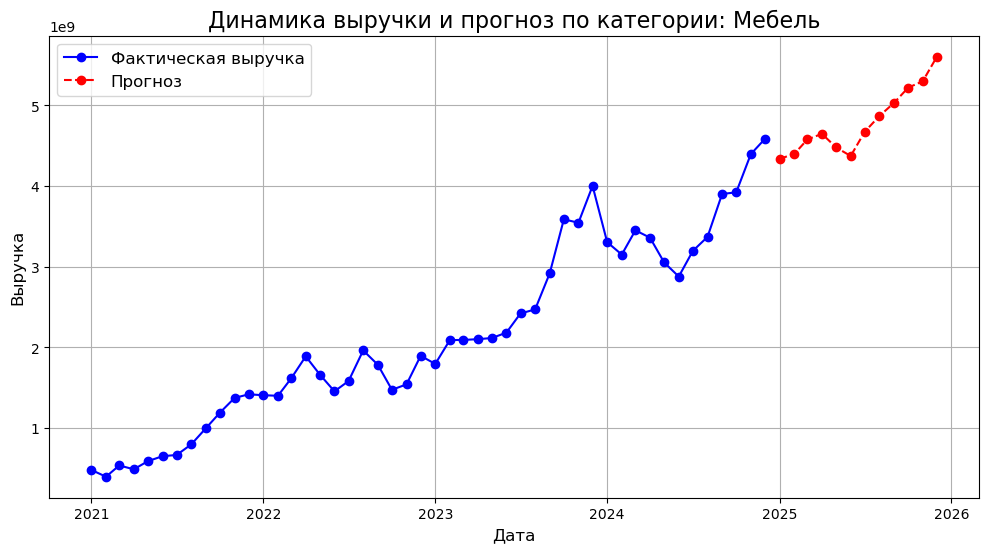

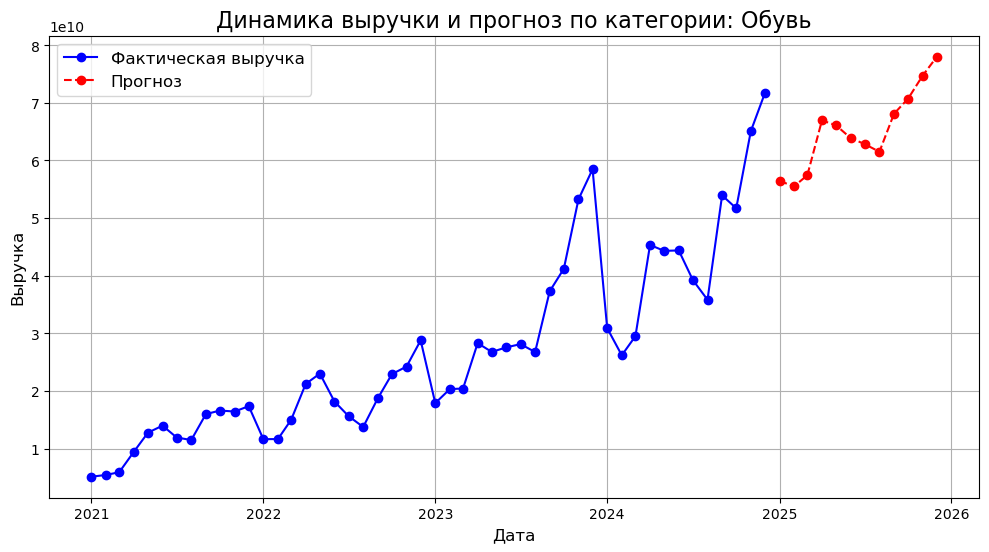

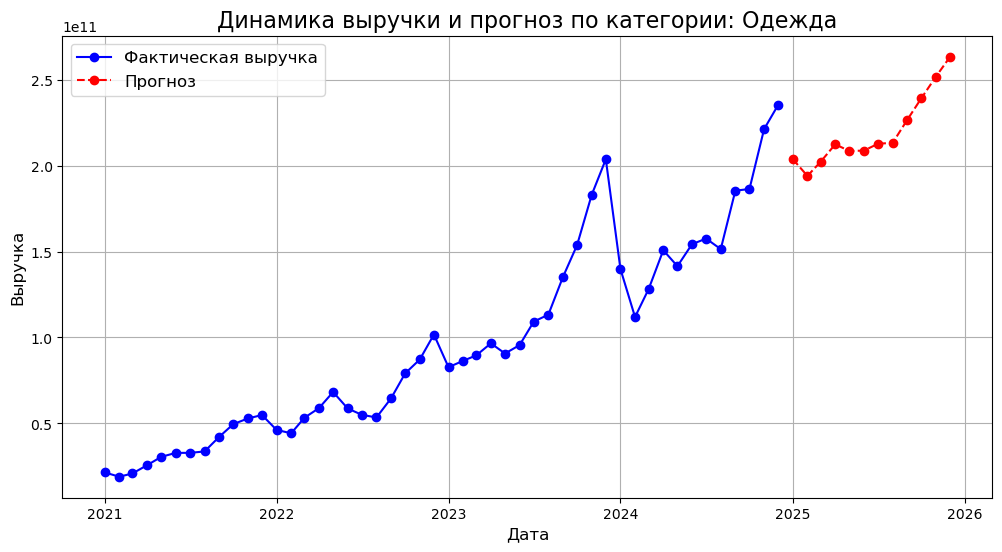

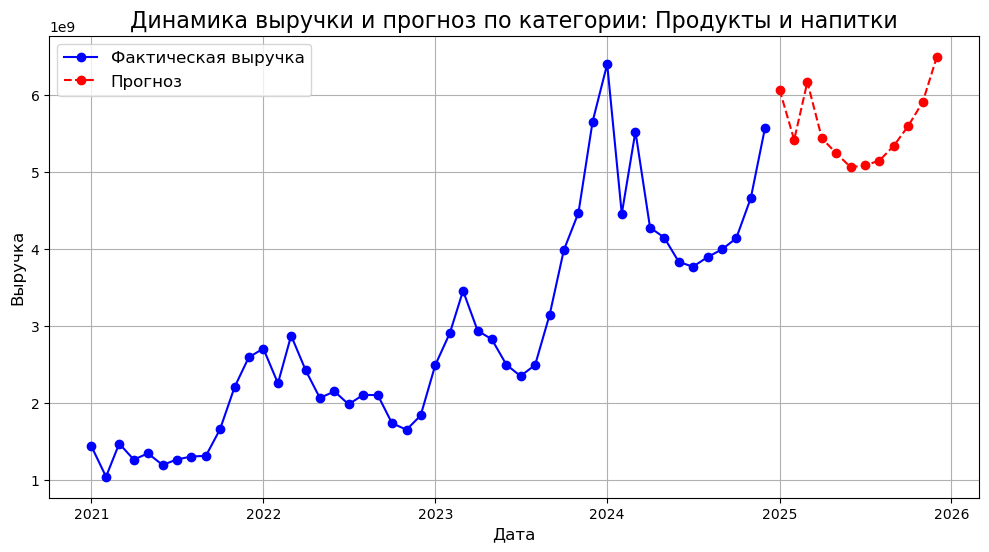

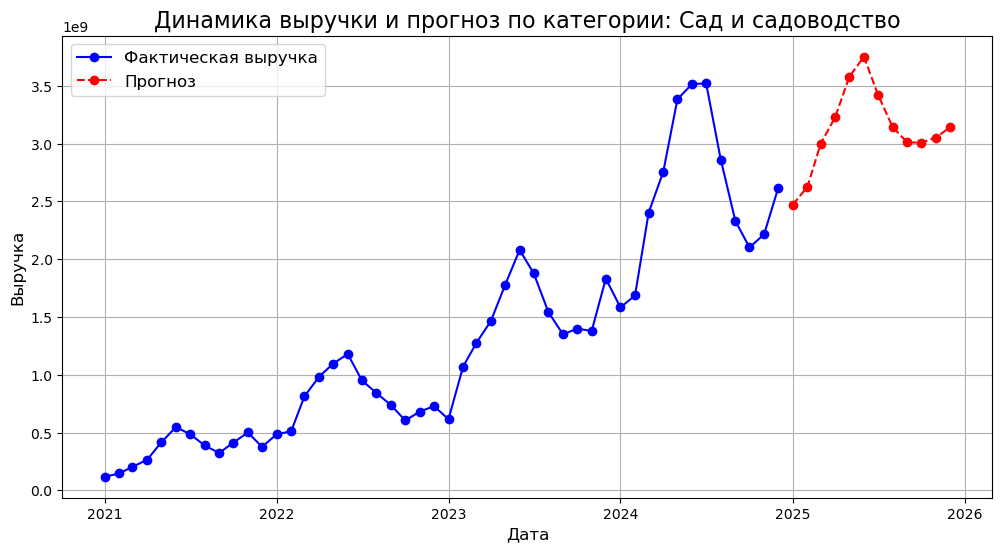

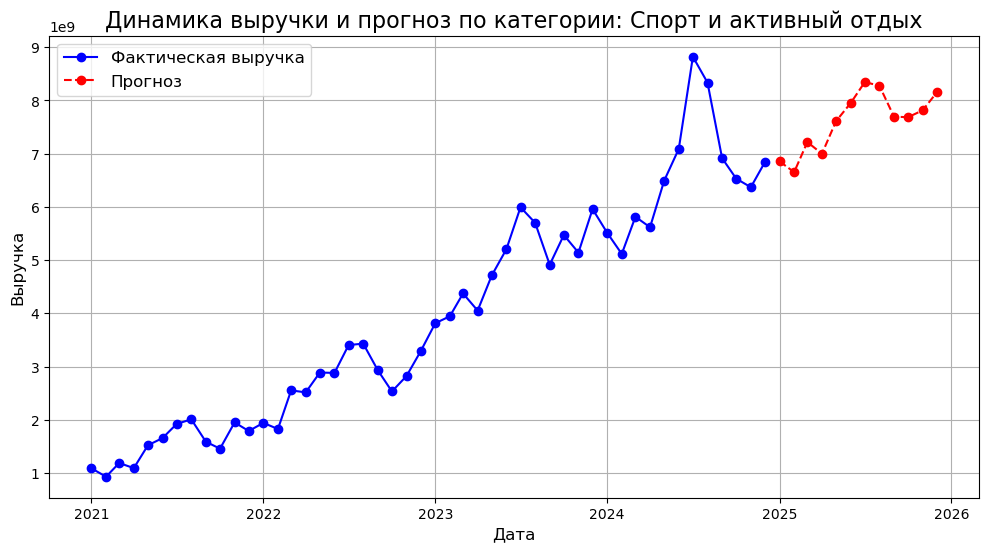

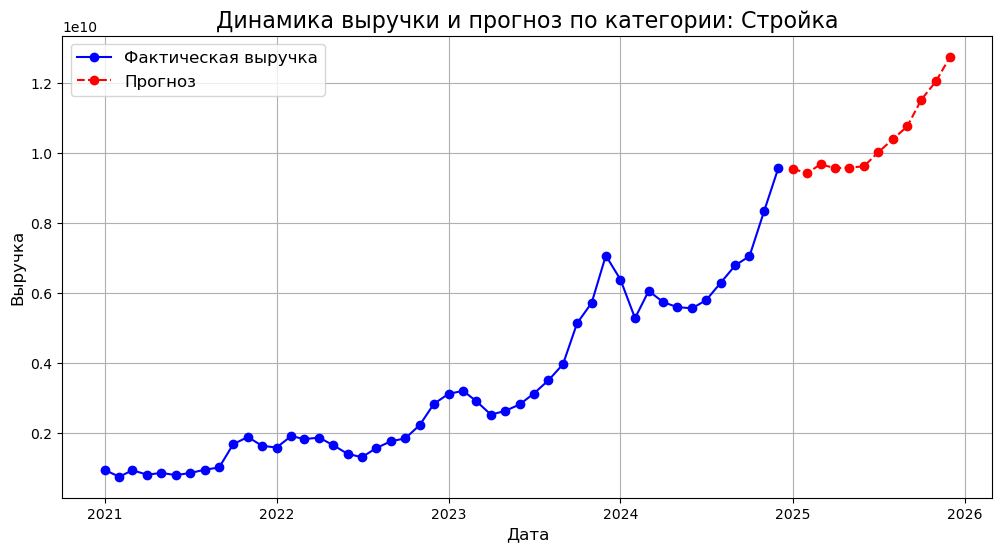

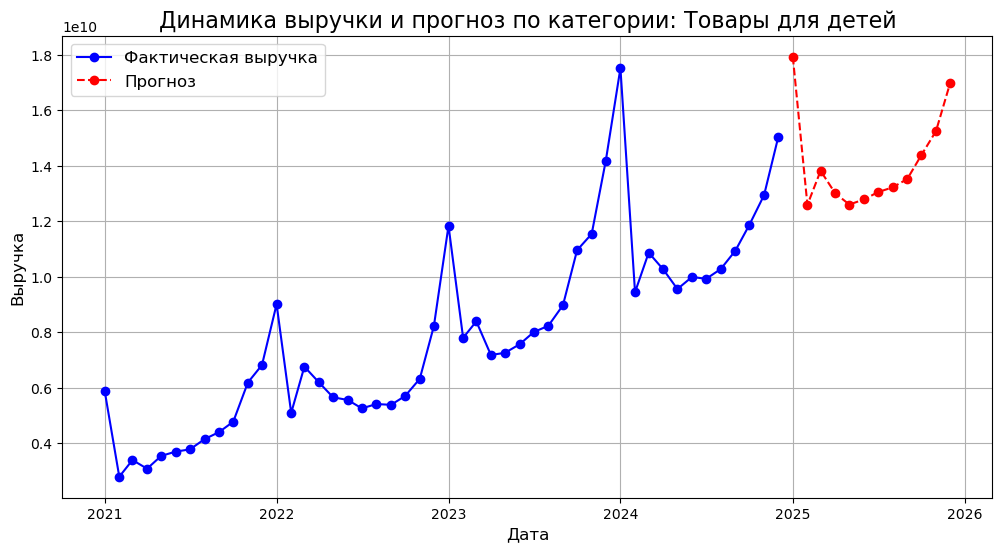

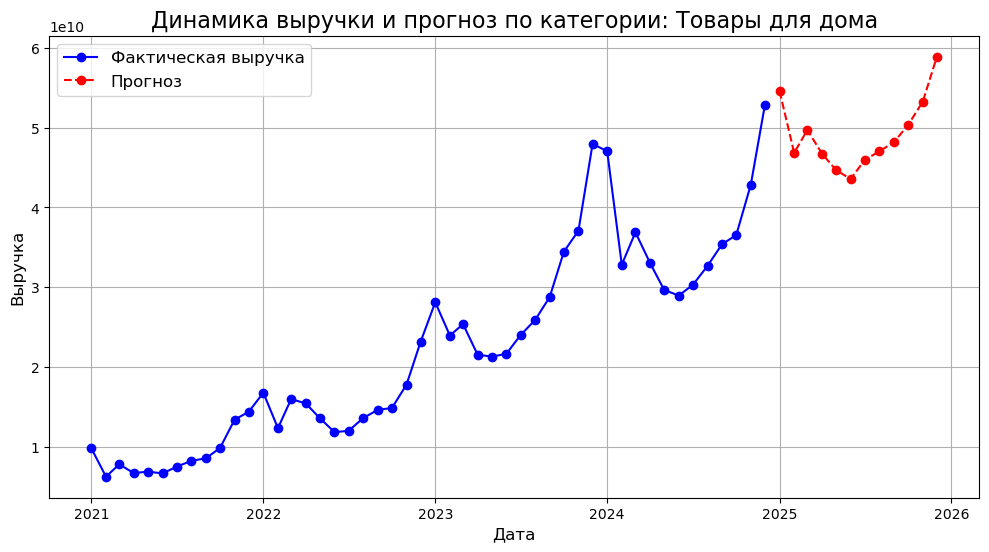

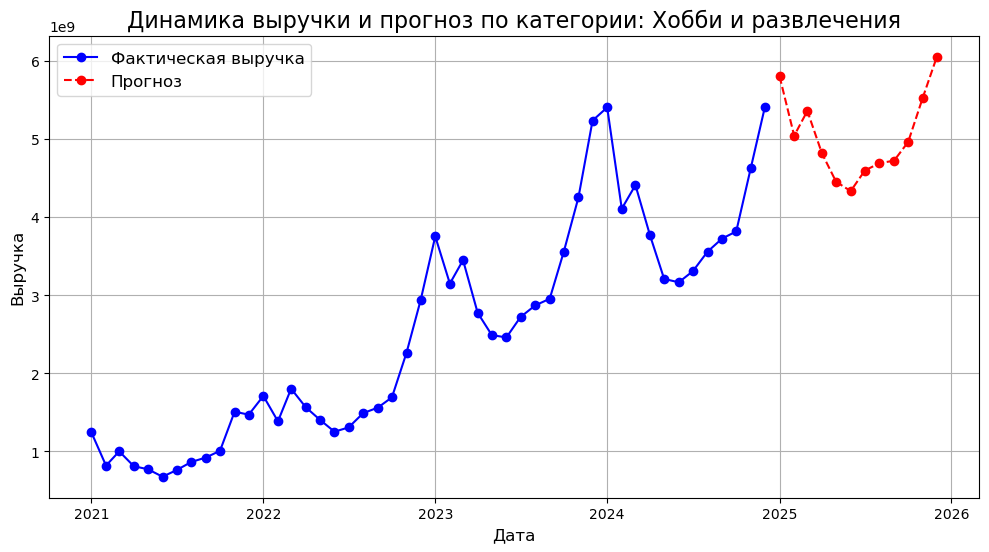

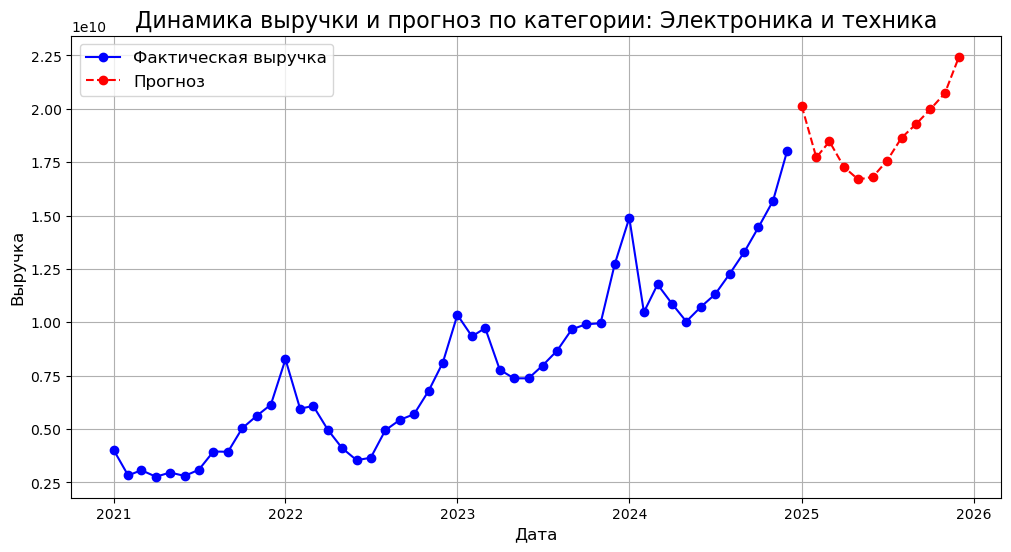

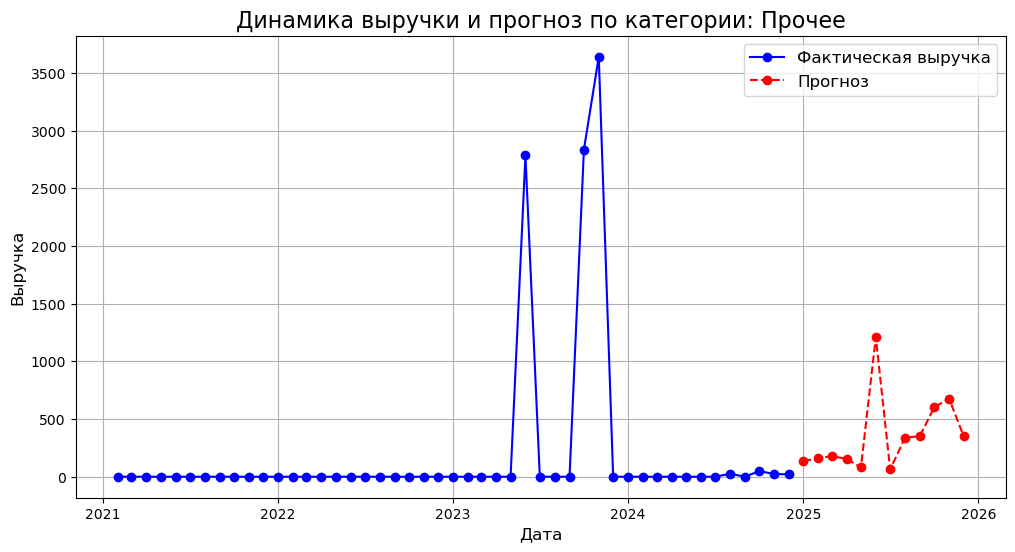

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Убедимся, что данные корректны
new_df['Дата'] = pd.to_datetime(new_df['Дата'])

# Группируем данные по категориям и датам
df_grouped = new_df.groupby(['Дата', 'Новая категория'])['Выручка'].sum().reset_index()

categories = df_grouped['Новая категория'].unique()
results = []

for category in categories:
    # Фильтрация данных для конкретной категории
    category_data = df_grouped[df_grouped['Новая категория'] == category]
    category_data = category_data.set_index('Дата').resample('MS').sum()  # Убедимся, что данные с интервалом месяц
    
    # Заполняем пропуски (если есть)
    category_data = category_data.asfreq('MS').fillna(0)
    
    # Проверяем длину данных
    if len(category_data) < 24:  # Меньше двух лет
        print(f"Недостаточно данных для сезонной модели для категории {category}")
        continue

    # Данные для модели
    train = category_data['Выручка']
    
    # Модель Holt-Winters с сезонностью
    model = ExponentialSmoothing(
        train,
        trend="add",
        seasonal="add",
        seasonal_periods=12  # Годовая сезонность
    )
    
    # Обучение модели
    fitted_model = model.fit()
    
    # Прогноз на 2025 год
    forecast = fitted_model.forecast(steps=12)
    forecast[forecast < 0] = 0  # Убираем отрицательные значения в прогнозе
    forecast_dates = pd.date_range(start='2025-01-01', periods=12, freq='MS')
    
    # Сравнение выручки 2024 и прогноза на 2025 год
    total_2024 = train.loc['2024-01-01':'2024-12-01'].sum()
    total_2025 = forecast.sum()
    delta = total_2025 - total_2024
    
    # Сохранение результатов
    results.append({
        'Новая категория': category,
        'Выручка 2024': total_2024,
        'Прогноз выручки 2025': total_2025,
        'Изменение выручки': delta,
        'Данные': category_data,
        'Прогноз': forecast,
        'Прогнозные даты': forecast_dates
    })

# Анализ результатов
results_df = pd.DataFrame(results)
results_df['Процентное изменение'] = (results_df['Изменение выручки'] / results_df['Выручка 2024']) * 100

# Категории с падением выручки
falling_categories = results_df[results_df['Изменение выручки'] < 0]

# Вывод результатов
print("Результаты прогноза:")
print(results_df)
print("\nКатегории с падением выручки:")
print(falling_categories)

# Построение графиков для всех новых категорий
for _, row in results_df.iterrows():
    category = row['Новая категория']
    category_data = row['Данные']
    forecast = row['Прогноз']
    forecast_dates = row['Прогнозные даты']
    
    # График
    plt.figure(figsize=(12, 6))
    plt.plot(category_data.index, category_data['Выручка'], marker='o', label='Фактическая выручка', color='blue')
    plt.plot(forecast_dates, forecast, marker='o', label='Прогноз', color='red', linestyle='--')
    plt.title(f"Динамика выручки и прогноз по категории: {category}", fontsize=16)
    plt.xlabel('Дата', fontsize=12)
    plt.ylabel('Выручка', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


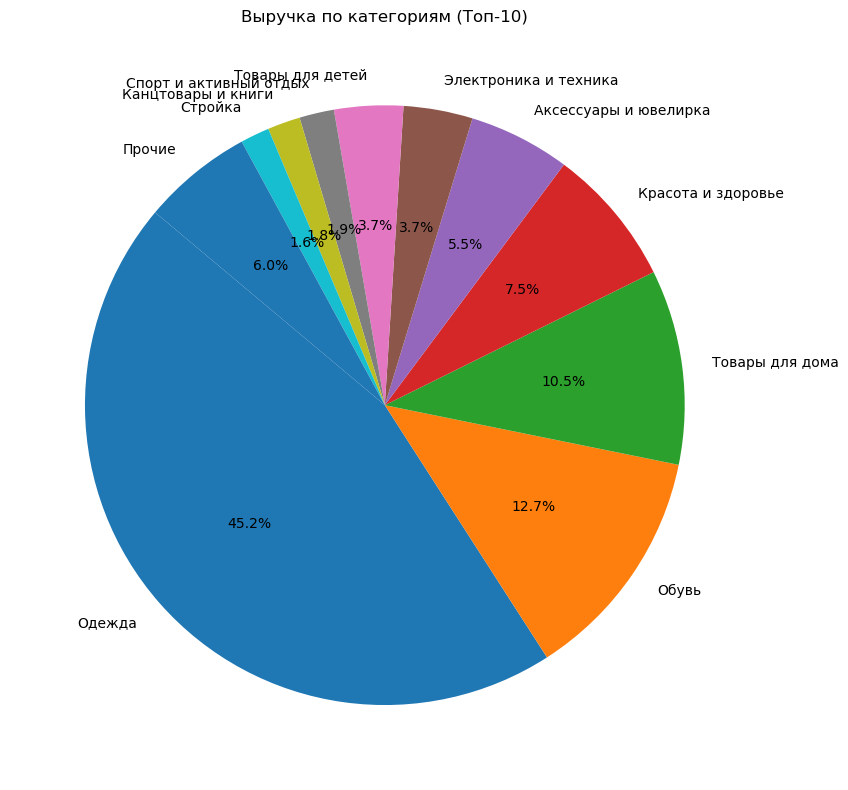

In [167]:
# Проверяем, что необходимые столбцы существуют
if {'Новая категория', 'Выручка'}.issubset(final_df.columns):
    # Группируем данные по категориям, суммируя выручку
    total_revenue_by_category = final_df.groupby('Новая категория')['Выручка'].sum()
    
    # Сортируем и выбираем 10 крупнейших категорий
    top_10_categories = total_revenue_by_category.nlargest(10)
    
    # Добавляем остальные категории в "Прочие"
    other_revenue = total_revenue_by_category.sum() - top_10_categories.sum()
    top_10_categories['Прочие'] = other_revenue
    
    # Построение круговой диаграммы
    plt.figure(figsize=(10, 8))
    top_10_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140, title='Выручка по категориям (Топ-10)')
    plt.ylabel('')  # Убираем подпись оси
    plt.tight_layout()
    plt.show()
else:
    print("Необходимые столбцы 'Категория' или 'Выручка' отсутствуют в DataFrame.")

Риск выкупа

In [16]:
new_df.columns

Index(['Предметы', 'Сезонность ниши', 'Избранное', 'Комиссия FBO',
       'Комиссия FBS', 'Товары', 'Количество новинок', 'Товары с остатками',
       'Товары с движением', '% товаров с движением', 'Товары с продажами',
       '% товаров с продажами', '% товаров с продажами от товаров с движением',
       'Бренды', 'Бренды с продажами', '% брендов с продажами', 'Продавцы',
       'Продавцы с продажами', '% продавцов с продажами', 'Продажи', 'Выручка',
       'Упущенная выручка', 'Упущенная выручка, %', 'Потенциал',
       'Средний % выкупа', 'Средний % выкупа с учетом возвратов',
       'Сумма выкупа', 'Сумма выкупа с учетом возврата', 'Суммарные остатки',
       'Замороженный остаток, шт.', 'Замороженный остаток в цене, ₽',
       'Замороженный остаток, %', 'Оборачиваемость, дн.', 'Оборачиваемость',
       'Минимальная цена', 'Максимальная цена', 'Средняя цена',
       'Медианная цена', 'Минимальная цена с продажами',
       'Максимальная цена с продажами', 'Средняя цена с продажами',

In [26]:
new_df_cleaned = new_df[(new_df['Средний % выкупа'] > 0) & (new_df['Средний % выкупа с учетом возвратов'] > 0)].copy()
new_df_cleaned

,Предметы,Сезонность ниши,Избранное,Комиссия FBO,Комиссия FBS,Товары,Количество новинок,Товары с остатками,Товары с движением,% товаров с движением,...,Средний рейтинг с продажами,Средний рейтинг MPSTATS,Средний рейтинг MPSTATS с продажами,Дата,Категория,Товар,Волатильность цены,Новая категория,Процент возвратов,Разница % выкупа
0,Телевизоры и аудиотехника / DJ контроллеры,3,False,"19,5","19,5",19,0,0,1,5,...,NaN,48.32,45.00,2021-01-01,Телевизоры и аудиотехника,DJ контроллеры,35460.70,Электроника и техника,100.00,0
1,Товары для животных / Душевые лейки для животных,3,False,"11,5","11,5",13,1,12,12,92,...,4.40,56.23,62.50,2021-01-01,Товары для животных,Душевые лейки для животных,1405.02,Животные,100.00,0
2,Все для садоводства / Сумки для выращивания ра...,3,False,"19,5","19,5",9,0,8,9,100,...,4.60,49.56,51.62,2021-01-01,Все для садоводства,Сумки для выращивания рассады,282.84,Сад и садоводство,97.78,-2
3,Автомобильные товары / Колпаки на колеса,2,False,"16,5","16,5",417,10,158,342,82,...,4.17,43.24,45.28,2021-01-01,Автомобильные товары,Колпаки на колеса,3882.72,Автомобили и транспорт,92.33,-6
4,Продукты / Мюсли,2,False,"11,5","11,5",245,4,125,168,69,...,4.32,51.54,55.00,2021-01-01,Продукты,Мюсли,820.95,Продукты и напитки,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328966,Красота / Бальзамы,1,False,"22,5","22,5",125593,10524,9073,14675,12,...,4.90,38.15,60.07,2024-12-01,Красота,Бальзамы,71749.42,Красота и здоровье,99.98,0
328967,Игровые консоли и игры / Подписки игровых серв...,2,False,"11,5","11,5",4751,717,621,745,16,...,4.85,30.94,59.70,2024-12-01,Игровые консоли и игры,Подписки игровых сервисов,190882.06,Электроника и техника,99.68,0
328968,Ручной инструмент и оснастка / Ручки для валиков,2,False,"21,5","21,5",977,89,54,96,10,...,4.88,27.42,46.20,2024-12-01,Ручной инструмент и оснастка,Ручки для валиков,7169.36,Стройка,100.00,0
328969,Посуда и инвентарь / Сливники для чая,3,False,"19,5","19,5",102,13,10,23,23,...,4.91,49.77,61.91,2024-12-01,Посуда и инвентарь,Сливники для чая,9061.57,Товары для дома,98.48,-2


In [30]:
# Рассчитываем разницу между 'Средний % выкупа с учетом возвратов' и 'Средний % выкупа' с использованием .loc
new_df_cleaned.loc[:, 'Разница % выкупа'] = new_df_cleaned['Средний % выкупа'] - new_df_cleaned['Средний % выкупа с учетом возвратов']
new_df_cleaned

,Предметы,Сезонность ниши,Избранное,Комиссия FBO,Комиссия FBS,Товары,Количество новинок,Товары с остатками,Товары с движением,% товаров с движением,...,Средний рейтинг с продажами,Средний рейтинг MPSTATS,Средний рейтинг MPSTATS с продажами,Дата,Категория,Товар,Волатильность цены,Новая категория,Процент возвратов,Разница % выкупа
0,Телевизоры и аудиотехника / DJ контроллеры,3,False,"19,5","19,5",19,0,0,1,5,...,NaN,48.32,45.00,2021-01-01,Телевизоры и аудиотехника,DJ контроллеры,35460.70,Электроника и техника,100.00,0
1,Товары для животных / Душевые лейки для животных,3,False,"11,5","11,5",13,1,12,12,92,...,4.40,56.23,62.50,2021-01-01,Товары для животных,Душевые лейки для животных,1405.02,Животные,100.00,0
2,Все для садоводства / Сумки для выращивания ра...,3,False,"19,5","19,5",9,0,8,9,100,...,4.60,49.56,51.62,2021-01-01,Все для садоводства,Сумки для выращивания рассады,282.84,Сад и садоводство,97.78,2
3,Автомобильные товары / Колпаки на колеса,2,False,"16,5","16,5",417,10,158,342,82,...,4.17,43.24,45.28,2021-01-01,Автомобильные товары,Колпаки на колеса,3882.72,Автомобили и транспорт,92.33,6
4,Продукты / Мюсли,2,False,"11,5","11,5",245,4,125,168,69,...,4.32,51.54,55.00,2021-01-01,Продукты,Мюсли,820.95,Продукты и напитки,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328966,Красота / Бальзамы,1,False,"22,5","22,5",125593,10524,9073,14675,12,...,4.90,38.15,60.07,2024-12-01,Красота,Бальзамы,71749.42,Красота и здоровье,99.98,0
328967,Игровые консоли и игры / Подписки игровых серв...,2,False,"11,5","11,5",4751,717,621,745,16,...,4.85,30.94,59.70,2024-12-01,Игровые консоли и игры,Подписки игровых сервисов,190882.06,Электроника и техника,99.68,0
328968,Ручной инструмент и оснастка / Ручки для валиков,2,False,"21,5","21,5",977,89,54,96,10,...,4.88,27.42,46.20,2024-12-01,Ручной инструмент и оснастка,Ручки для валиков,7169.36,Стройка,100.00,0
328969,Посуда и инвентарь / Сливники для чая,3,False,"19,5","19,5",102,13,10,23,23,...,4.91,49.77,61.91,2024-12-01,Посуда и инвентарь,Сливники для чая,9061.57,Товары для дома,98.48,2


In [31]:
# Группируем по категории и находим среднюю разницу по каждой категории
category_buyback_diff = new_df_cleaned.groupby('Новая категория')['Разница % выкупа'].mean()

# Сортируем по убыванию, чтобы увидеть категории с наибольшей разницей
top_categories_diff = category_buyback_diff.sort_values(ascending=False)

# Отобразим результат
print(top_categories_diff)

Новая категория
Обувь                    2.63
Одежда                   1.88
Товары для детей         1.40
Животные                 1.35
Электроника и техника    1.20
Автомобили и транспорт   1.01
Мебель                   0.98
Товары для дома          0.85
Аксессуары и ювелирка    0.84
Спорт и активный отдых   0.78
Стройка                  0.74
Канцтовары и книги       0.53
Хобби и развлечения      0.50
Сад и садоводство        0.37
Красота и здоровье       0.34
Продукты и напитки       0.29
Прочее                   0.00
Name: Разница % выкупа, dtype: float64


Одежда

In [26]:
# Фильтруем данные, оставляя только те строки, которые удовлетворяют условиям
final_df_cleaned = final_df[
    (final_df['Средний % выкупа'] > 0) &
    (final_df['Средний % выкупа с учетом возвратов'] > 0) &
    (final_df['Категория'].isin(['Одежда', 'Белье', 'Спортивная одежда', 'Спецодежда и СИЗы', 'Головные уборы']))
].copy()

# Рассчитываем разницу
final_df_cleaned.loc[:, 'Разница % выкупа'] = (
    final_df_cleaned['Средний % выкупа'] - final_df_cleaned['Средний % выкупа с учетом возвратов']
)

# Группируем по категории и вычисляем среднюю разницу
category_buyback_diff = final_df_cleaned.groupby('Категория')['Разница % выкупа'].mean()

# Сортируем по убыванию
top_categories_diff = category_buyback_diff.sort_values(ascending=False)

# Отображаем результат
print(top_categories_diff)

Категория
Головные уборы      2.92
Одежда              2.57
Спортивная одежда   2.41
Спецодежда и СИЗы   1.86
Белье               0.21
Name: Разница % выкупа, dtype: float64


Обувь

In [39]:
# Фильтруем данные, оставляя только те строки, которые удовлетворяют условиям
final_df_cleaned = final_df[
    (final_df['Средний % выкупа'] > 0) &
    (final_df['Средний % выкупа с учетом возвратов'] > 0) &
    (final_df['Категория'].isin(['Обувь', 'Спортивная обувь',  
    ]))
].copy()

# Рассчитываем разницу
final_df_cleaned['Разница % выкупа'] = final_df_cleaned['Средний % выкупа'] - final_df_cleaned['Средний % выкупа с учетом возвратов']

final_df_cleaned  

,Предметы,Сезонность ниши,Избранное,Комиссия FBO,Комиссия FBS,Товары,Количество новинок,Товары с остатками,Товары с движением,% товаров с движением,...,Средний дробный рейтинг с продажами,Средний дробный рейтинг,Средний рейтинг с продажами,Средний рейтинг MPSTATS,Средний рейтинг MPSTATS с продажами,Дата,Категория,Товар,Волатильность цены,Разница % выкупа
656,Обувь / Лоферы,2,False,"24,5","24,5",8711,39,5352,5696,65,...,"4,34","4,27",4.42,43.99,48.35,2021-01-01,Обувь,Лоферы,24926.22,3
658,Спортивная обувь / Чешки,2,False,"24,5","24,5",741,35,449,481,65,...,"4,18","4,12",4.18,47.81,52.36,2021-01-01,Спортивная обувь,Чешки,1067.73,5
668,Обувь / Слиперы,2,False,25,25,2744,1,1538,1608,59,...,"4,32","4,25",4.36,43.49,49.50,2021-01-01,Обувь,Слиперы,20985.52,0
713,Спортивная обувь / Боксерки,2,False,"24,5","24,5",8,4,7,7,88,...,"3,87","3,95",4.17,56.38,54.43,2021-01-01,Спортивная обувь,Боксерки,1520.99,3
811,Обувь / Эспадрильи,3,False,"24,5","24,5",2317,3,1337,1384,60,...,"4,21","4,05",4.24,39.51,45.64,2021-01-01,Обувь,Эспадрильи,17362.30,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328343,Обувь / Сноубутсы,3,False,"24,5","24,5",5764,839,1032,1408,24,...,"4,55","4,47",4.85,47.34,56.31,2024-12-01,Обувь,Сноубутсы,34365.39,3
328476,Спортивная обувь / Аквасоки,2,False,"24,5","24,5",3803,237,1269,1506,40,...,"4,71","4,59",4.96,53.36,64.21,2024-12-01,Спортивная обувь,Аквасоки,12054.76,5
328578,Спортивная обувь / Стрипы,2,False,"24,5","24,5",938,45,418,525,56,...,"4,63","4,58",4.82,59.47,66.35,2024-12-01,Спортивная обувь,Стрипы,20345.58,6
328720,Спортивная обувь / Боты для дайвинга,2,False,"24,5","24,5",109,12,53,55,50,...,"4,63","4,62",4.75,43.73,56.28,2024-12-01,Спортивная обувь,Боты для дайвинга,10035.97,4


In [44]:
# Группируем по категории и вычисляем среднюю разницу
category_buyback_diff = final_df_cleaned.groupby('Товар')['Разница % выкупа'].mean()

# Сортируем по убыванию
top_categories_diff = category_buyback_diff.sort_values(ascending=False)

# Отображаем результат
print(top_categories_diff)

Товар
Скальные туфли             10.00
Пуанты                      5.25
Сандалии                    5.00
Аквасоки                    4.25
Чешки                       4.25
Стрипы                      4.12
Эспадрильи                  4.00
Боты для дайвинга           4.00
Дутики                      4.00
Босоножки                   4.00
Валенки                     4.00
Унты                        4.00
Полуботинки                 4.00
Луноходы                    3.75
Сноубутсы                   3.75
Мюли                        3.25
Балетки                     3.25
Туфли                       3.00
Сабо                        3.00
Сапоги                      3.00
Мокасины                    3.00
Полусапожки                 3.00
Лоферы                      3.00
Ботильоны                   3.00
Джазовки                    3.00
Шиповки                     3.00
Боксерки                    3.00
Борцовки                    3.00
Ботинки лыжные              3.00
Кеды                        3.00
Боти

In [34]:
final_df

,Предметы,Сезонность ниши,Избранное,Комиссия FBO,Комиссия FBS,Товары,Количество новинок,Товары с остатками,Товары с движением,% товаров с движением,...,% оформления заказов,Средний дробный рейтинг с продажами,Средний дробный рейтинг,Средний рейтинг с продажами,Средний рейтинг MPSTATS,Средний рейтинг MPSTATS с продажами,Дата,Категория,Товар,Волатильность цены
0,Телевизоры и аудиотехника / DJ контроллеры,3,False,"19,5","19,5",19,0,0,1,5,...,0,NaN,"3,68",NaN,48.32,45.00,2021-01-01,Телевизоры и аудиотехника,DJ контроллеры,35460.70
1,Товары для животных / Душевые лейки для животных,3,False,"11,5","11,5",13,1,12,12,92,...,0,"4,06","3,78",4.40,56.23,62.50,2021-01-01,Товары для животных,Душевые лейки для животных,1405.02
2,Все для садоводства / Сумки для выращивания ра...,3,False,"19,5","19,5",9,0,8,9,100,...,0,"4,28","4,28",4.60,49.56,51.62,2021-01-01,Все для садоводства,Сумки для выращивания рассады,282.84
3,Автомобильные товары / Колпаки на колеса,2,False,"16,5","16,5",417,10,158,342,82,...,0,"4,04","4,11",4.17,43.24,45.28,2021-01-01,Автомобильные товары,Колпаки на колеса,3882.72
4,Продукты / Мюсли,2,False,"11,5","11,5",245,4,125,168,69,...,0,"4,16","4,07",4.32,51.54,55.00,2021-01-01,Продукты,Мюсли,820.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328966,Красота / Бальзамы,1,False,"22,5","22,5",125593,10524,9073,14675,12,...,"18,46","4,73","4,66",4.90,38.15,60.07,2024-12-01,Красота,Бальзамы,71749.42
328967,Игровые консоли и игры / Подписки игровых серв...,2,False,"11,5","11,5",4751,717,621,745,16,...,"10,49","4,72","4,69",4.85,30.94,59.70,2024-12-01,Игровые консоли и игры,Подписки игровых сервисов,190882.06
328968,Ручной инструмент и оснастка / Ручки для валиков,2,False,"21,5","21,5",977,89,54,96,10,...,"9,28","4,74","4,79",4.88,27.42,46.20,2024-12-01,Ручной инструмент и оснастка,Ручки для валиков,7169.36
328969,Посуда и инвентарь / Сливники для чая,3,False,"19,5","19,5",102,13,10,23,23,...,"10,14","4,84","4,79",4.91,49.77,61.91,2024-12-01,Посуда и инвентарь,Сливники для чая,9061.57
